![LogoAdway](https://www.square-management.com/wp-content/uploads/2021/10/adway-logo-header.svg) 
 <hr style = "border-width:2px;border-color:#75DFC1">
# &#128736; Estimation des émissions GES (Gaz à Effet de Serre) &#128736; 
<hr style = "border-width:2px;border-color:#75DFC1"><br>

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id = "attribution" style = "float:right; color:#999; background:#fff;">
*Created with Jupyter Notebook, Python 3.8.3.* 
<br>
*By SKORUPA KONRAD<br>
</footer>

## **A. INTRODUCTION** - Import Packages  &#127793; 
<br>

In [1]:
#classiques
import numpy as np
import pandas as pd
import json

#graphiques
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter 
#autres

#qui permet de facilement transformer les variable cara en numérique
from sklearn.preprocessing import LabelEncoder

#calculer les differents metrics pour comparaison des modèles
from sklearn import metrics

from scipy import stats
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import statsmodels.api as sm

#regular expressions
import re

#Afficher toutes les colonnes
pd.set_option('display.max_colwidth', None)

<hr style = "border-width:2px;border-color:#c7cf00">
## **B. INTRODUCTION** - Présentation du sujet  &#128154; 
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

### **1. Documentations** - GES<br>


                  Sites Internet : 
<br>
<br>
[ADEME-GES](https://www.bilans-ges.ademe.fr/fr/accueil/contenu/index/page/categorie/siGras/0/) 
<br>
<br>
[Infos règlementaire sur les GES](https://www.bilans-ges.ademe.fr/fr/accueil/contenu/index/page/art75/siGras/0/) 
<br>


### 2. Définition du sujet d'étude - GES

> `Un Bilan GES` est une évaluation de la quantité de **gaz à effet de serre** émise (ou captée) dans l’atmosphère sur une année par les activités d’une organisation ou d'un territoire.

>Les émissions de l’entité sont ordonnées selon des catégories prédéfinies appelées postes. Ce classement permet d’identifier les postes d’émissions où la contrainte `carbone` est **la plus forte**. C’est sur ces postes que doivent porter les stratégies énergétiques et environnementales de l’entité réalisant son bilan pour **réduire ses émissions**.

**Les principaux points à retenir de cette méthode :**

>l’obligation de prise en compte des émissions directes, et indirectes liées à la consommation d’électricité, chaleur ou vapeur nécessaires aux activités de la personne morale (SCOPES 1 et 2) ;

>le SCOPE 3 (les autres émissions indirectes) est optionnel mais recommandé ;

>exercice à l’échelle du patrimoine et des compétences de la collectivité : cela signifie la prise en compte des émissions générées par le fonctionnement des activités et services de la collectivité et la mise en œuvre des compétences via une approche organisationnelle (y.c pour les services dont l’exploitation a été externalisée, au même titre qu’une entreprise). La méthode recommande néanmoins de compléter le bilan Patrimoine et compétences par un bilan du territoire pour mieux s’articuler avec les objectifs du PCET. Les deux échelles doivent cependant bien être distinguées pour répondre à l’obligation ;

>ce bilan doit être mis à jour tous les 3 ans pour les services de l'Etat, les collectivités territoriales et les autres personnes morales de droit public; tous les 4 ans pour les entreprises.
les facteurs d'émissions à utiliser par défaut sont ceux de la Base Carbone® (pour l'électricité, la référence à la Base Carbone® est obligatoire). Les organisations ont la possibilité de choisir d’autres facteurs d’émissions si elles le justifient ;

>le plan d’action, qui devient un « plan de transition » (cf La loi n° 2019-1147 du 8 novembre 2019 relative à l'énergie et au climat) présente les objectifs, moyens et actions envisagés à cette fin et, le cas échéant, les actions mises en œuvre lors du précédent bilan. Les collectivités soumises à PCAET peuvent en être exonérées si celui-ci couvre également les émissions du BEGES. Les entreprises, soumises au reporting extra-financier sont aussi exonérées du « plan de transition » d'un BEGES. <br>


### 3. Les différents "Postes" - GES <br>


<hr style="border-width:2px;border-color:#75DFC1">
                                                        SCOPE 1 
<hr style="border-width:2px;border-color:#75DFC1">

> * Emissions directes des sources fixes de combustion
> * Emissions directes des sources mobiles à moteur thermique
> * Emissions directes des procédés hors énergie
> * Emissions directes fugitives
> * Emissions issues de la biomasse (sols et forêts)

<hr style="border-width:2px;border-color:#bf7815">
                                                        SCOPE 2 
<hr style="border-width:2px;border-color:#bf7815">

> * Emissions indirectes liées à la consommation d'électricité
> * Emissions indirectes liées à la consommation de vapeur, chaleur ou froide

<hr style="border-width:2px;border-color:#3632a8">
                                                        SCOPE 3 
<hr style="border-width:2px;border-color:#3632a8">

> * Emissions liées à l'énergie non incluse dans les catégories « émissions directes de GES » et « émissions de GES à énergie indirectes »
> * Achats de produits ou services
> * Immobilisations de biens
> * Déchets
> * Transport de marchandise amont
> * Déplacements professionnels
> * Actifs en leasing amont
> * Investissements
> * Transport de visiteurs et de clients
> * Transport de marchandise aval
> * Utilisation des produits vendus
> * Fin de vie des produits vendus
> * Franchise aval
> * Leasing aval
> * Déplacements domicile travail
> * Autres émissions indirectes<br>
<br>


### 4. Problématique - GES<br>


Pour ce projet, l'énoncé du problème nous est donné sur un plateau d'or, développez un algorithme pour estimer les émissions des Gaz à Effet de Serre

**Résumé du projet** : ...

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1> Questions & Answers </h1></center>
<center><h2> 1.Comment interpréter mes résultats d'empreinte carbone ? </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

L’empreinte carbone moyenne d’un Français s'établit à `11,2 tonnes d'équivalent CO2` par habitant et par an en 2018. Vous pouvez vous référer à ce niveau dit “normal” pour vous situez.  

<hr style="border-width:2px;border-color:#75DFC1">
<center><h2> 2. Pourquoi est-il important de réduire son empreinte carbone ? </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

Sans diminution des rejets de **gaz à effet de serre** (GES) issus de l'activité humaine, la température moyenne à la surface du globe augmenterait de 2°C à 3,5°C d'ici 2100, selon les projections du GIEC (Groupe d'experts intergouvernemental sur l'évolution du climat). Ce réchauffement menace **d’augmenter** le nombre `d'évènements climatiques extrêmes`, en particulier les sécheresses, la montée des océans et leur acidification, avec de nombreuses conséquences **négatives** sur la santé et le développement humain. 

<hr style="border-width:2px;border-color:#75DFC1">
<center><h2> 3. Qu’est-ce que le réchauffement climatique ? </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

Le réchauffement climatique est le phénomène **d’augmentation** de la température moyenne à la surface du globe, du fait du développement des activités humaines qui rejettent dans l’atmosphère des **gaz à effet de serre**. Il faut bien faire la différence entre ce réchauffement global et la météo qu’il peut faire à un moment et un endroit donné. Une vague de froid locale `ne remet pas` en cause la réalité du réchauffement planétaire : celui-ci s’observe sur des échelles de temps plus longues en mesurant les valeurs moyennes de paramètres météorologique sur de vastes zones géographiques.

<hr style="border-width:2px;border-color:#75DFC1">
<center><h2> 4. Qu’est-ce qu’un gaz à effet de serre ? </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

L’ effet de serre est à l’origine un phénomène `naturel`. L’atmosphère, l’enveloppe gazeuse qui entoure notre planète, est un véritable filtre par rapport aux rayons du soleil : approximativement 30 % du rayonnement solaire est réfléchi vers l’espace par les nuages, la poussière et les surfaces réfléchissantes. Les 70 % restants sont absorbés par la surface de la Terre et réémis sous la forme de rayonnement infrarouge. **Une partie de ce rayonnement est alors absorbée par l’atmosphère, qui se réchauffe.** 

Différents **gaz à effet de serre** sont émis par les activités humaines :

- Du `gaz carbonique (CO2)`, issu de la combustion des énergies fossiles (pétrole, charbon...) ou de la déforestation et du retournement des sols ; 
- Du `méthane`, issu de l’usage d’engrais azotés en agriculture, du traitement, du stockage et de l’épandage des déjections animales, de la fermentation entérique des ruminants ;
- Du `protoxyde d’azote`, émis par certains engrais ou par certains procédés chimiques ;
- Des `gaz fluorés` utilisés comme propulseurs, pour la fabrication de mousses ou de composants électroniques, dans les climatiseurs..

<hr style="border-width:2px;border-color:#75DFC1">
<center><h2> 5. Comment comptabilise-t-on les émissions carbone ?  </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

Lors de la réalisation d’un bilan d’émissions de gaz à effet de serre pour une entreprise, on comptabilise typiquement trois champs d’émissions distincts (généralement désignés par scope 1, 2, 3) :  
`les émissions directes`, qui correspondent aux émissions de gaz à effet de serre physiquement produits par une activité (combustion d'un combustible, émissions de process, fuites de gaz fluorés etc.) et qui permettent d'établir les inventaires nationaux;  
`Les émissions indirectes` liées à l’énergie (correspondent à la consommation d'une énergie finale dont les émissions ne sont pas émises sur le lieu de consommation, mais de production, comme l’électricité par exemple);   
`Les autres émissions indirectes`, c’est-à-dire l’ensemble des émissions nécessaires à une activité ou à la mise à disposition d’un produit dont les sources sont en dehors du périmètre organisationnel (transport, distribution, stockage, production d’emballages, amont agricole pour un produit agro-alimentaire par exemple).

<hr style="border-width:2px;border-color:#75DFC1">
<center><h2> 6. 1t de CO2 ? A quoi cela correspond  </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

Une tonne de CO2 équivaut à :

- Un volume de 534 m3 à 15ºC
- un vol aller/retour Paris-New-York (par passager)
- un trajet de 6000 km avec une voiture au diesel
- Les émissions mensuelles moyennes d’un Français
- La quantité de carbone stockée par 5 arbres mûrs.

<hr style="border-width:2px;border-color:#75DFC1">
<center><h2> 7. Qu'est-ce qu'un Bilan GES ?   </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

**Le Bilan GES**, ou bilan de **gaz à effet de serre**, vise à comptabiliser toutes les émissions induites directement et indirectement par une entreprise.

Ces émissions sont issues de différents gaz (CO2, méthane, gaz fluorés…). Par simplicité, le Bilan GES comptabilise toutes les émissions en **“CO2 équivalent”** (CO2e)
Les émissions des entreprises sont divisées en 3 périmètres, appelés “Scope” :

- `Le Scope 1` désigne toutes les émissions produites directement par les véhicules, les machines et les locaux de l’entreprise (combustion d'hydrocarbures, fuites de gaz fluorés).

- `Le Scope 2` comptabilise les émissions liées à la production de l’électricité consommée par l’entreprise. 

- `Le Scope 3`, qui comptabilise toutes les émissions de la chaîne de valeur de l’entreprise. Ce périmètre est divisé en deux :
Le Scope 3 amont : il intègre toutes les émissions en amont de la chaîne de valeur de l’entreprise : achats, immobilisation, déplacements… 
Le Scope 3 aval : ce sont toutes les émissions induites après la vente de produits ou de services : utilisation des produits vendus, fin de vie… 

<hr style = "border-width:2px;border-color:#c7cf00">
 ## **C. Rassemblez les données** - GES &#128200; 
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

<!--- En HTML, span fait référence à un text quelconque, rien de particulier  -->
 *COMMENTAIRES*     
 *Load la base de donnée provenant du site GES* 
*Transformation de la base JSON en DataFrame*  

In [2]:
file = open("ademe_db_v3.json",  encoding="utf8")
json_base = json.load(file)
file.close()

#dsn --> Data Set Name
DSN = pd.DataFrame(json_base)
DSN_Transpose = DSN.T

<hr style = "border-width:2px;border-color:#c7cf00">
## **D. Data Cleaning** - GES &#128200; 
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

*COMMENTAIRES*  
*C'est l'étape de rencontre avec les données. Apprenez à connaître vos données, à quoi ressemble-t-il (type de données et valeurs), qu'est-ce qui le fait fonctionner (variables indépendantes/de caractéristique), quels sont ses objectifs, quelles informations donnent elles (variables dépendantes/cibles). Existe-t-il des redondances de données ? *

In [3]:
def missing_zero_values_table(df):
    ''' Permet de faire une première inspection de la Base de Donnée en affichant pour chacune des variables :
    le nombre de valeur nulles (en nombres et pourcentages), non renseignés (en nombres et pourcentages), Type de data '''

    zero_val = (df == 0.0).sum(axis=0)
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table.sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
            " columns that have missing values.")

    return mz_table

In [4]:
#Pour les variables numériques, remplacer les ',' par '.'. Pour Python reconnaisse le format numérique
DSN_Transpose_TEMP = DSN_Transpose.copy() 
DSN_Transpose_TEMP = DSN_Transpose_TEMP.drop(["descriptif", "url", "type", "consolidation","annee","siren","naf","localisation"],axis=1)
for VariableColonne in DSN_Transpose_TEMP:
        DSN_Transpose_TEMP[VariableColonne] = [float(str(lettre).replace(",", ".")) for lettre in DSN_Transpose_TEMP[VariableColonne]]

#Nous remettons les variables caractère dans le DSN 
DSN_Transpose_TEMP["descriptif"]    = DSN_Transpose["descriptif"]
DSN_Transpose_TEMP["url"]           = DSN_Transpose["url"]
DSN_Transpose_TEMP["type"]          = DSN_Transpose["type"]
DSN_Transpose_TEMP["consolidation"] = DSN_Transpose["consolidation"]
DSN_Transpose_TEMP["annee"]         = DSN_Transpose["annee"]
DSN_Transpose_TEMP["siren"]         = DSN_Transpose["siren"]
DSN_Transpose_TEMP["naf"]           = DSN_Transpose["naf"]
DSN_Transpose_TEMP["localisation"]  = DSN_Transpose["localisation"]

#Ecraser la DSN Temporaire en DSN de travail 
DSN_Transpose = DSN_Transpose_TEMP.copy()

In [5]:
missing_zero_values_table(DSN_Transpose)

Your dataframe has 32 columns and 1933 Rows.
There are 32 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Franchise aval,0,1925,99.6,1925,99.6,float64
Investissements,0,1923,99.5,1923,99.5,float64
Leasing aval,0,1923,99.5,1923,99.5,float64
Actifs en leasing amont,0,1915,99.1,1915,99.1,float64
Emissions issues de la biomasse (sols et forêts),0,1886,97.6,1886,97.6,float64
Utilisation des produits vendus,0,1882,97.4,1882,97.4,float64
Fin de vie des produits vendus,0,1878,97.2,1878,97.2,float64
Transport de visiteurs et de clients,0,1833,94.8,1833,94.8,float64
Transport de marchandise aval,0,1824,94.4,1824,94.4,float64
Autres émissions indirectes,0,1776,91.9,1776,91.9,float64


*COMMENTAIRES :*    
<span style='color:#686868'> Nous créeons notre propre outil d'inspection de données, qui pourra servir de base à une analyse exploratoire complète de n'importe quel jeu de données importables avec Pandas. 
<br> Nous allons nous s'interesser notamment des valuers renseignées qui sont des `0.0` et des valeurs non renseignés autrement dit des `NaN`. Nous distinguons ces deux valeurs. Nous allons représenter les valeurs en nombres et en pourcentages 
<br>
<br> Les variables concernant les `postes` sont maintenant numeriques. Néanmois 61 organisations n'ont pas de type, consolidation etc... Pas de variables renseignés avec un 0 
<br>
<br> Beaucoup de valeur manquantes pour certaines modules
<br> 1.Existe-t-il des sociétés où aucun poste n'est renseigné ?
<br> 2.Les 61 organisations sont elles une erreur ? mauvais renseignement ? problème sur le site de GES ?
<br> 3.Des organisations qui n'ont pas d'émission indirecte liées à la consomation d'éléctricité ? 
<br> 78,9% des organisations n'ont pas de déchets (SCOPE 3 non obligatoire) 

<span style="font-size:15px; texdt-decoration : underline; color:#686868"> Exemple : d'organisations qui n'a rien renseingé comme GES dans la base</span> 

In [6]:
DSN_Transpose_TEMP = DSN_Transpose.copy()  
DSN_Transpose_TEMP = DSN_Transpose_TEMP.drop(["descriptif", "url", "type", "consolidation","annee","siren","naf","localisation","effectifs"],axis=1)

compter_nb_colonne_vide = DSN_Transpose_TEMP.isna().sum(axis = 1)
compter_nb_colonne_vide = pd.DataFrame(compter_nb_colonne_vide, columns=['compter_nb_colonne_vide'])
maximum                 = compter_nb_colonne_vide['compter_nb_colonne_vide'].max()
compter_nb_colonne_vide = compter_nb_colonne_vide[compter_nb_colonne_vide['compter_nb_colonne_vide']==maximum]

In [7]:
print("Nombre d'organisations qui ont renseigné aucun GES :", compter_nb_colonne_vide.shape[0])

Nombre d'organisations qui ont renseigné aucun GES : 62


<span style="font-size:15px; texdt-decoration : underline; color:#686868"> Au final les sociétés ont bien renseigné sur le site de l'ADEME mais n'a pas été repertoirié (manque de l'onglet correspond)

&#10071; **DELETE** &#10071; 
<br>
**Nous supprimons ces observations qui nous renseigne aucune information utile**

In [8]:
a_supprimer = compter_nb_colonne_vide.index

for Organisation_supp in a_supprimer:
    DSN_Transpose = DSN_Transpose.drop([Organisation_supp])
print(50*"-")    
print("Nombre d'organisations: ",DSN_Transpose.shape[0])
print(50*"-")   

--------------------------------------------------
Nombre d'organisations:  1871
--------------------------------------------------


 *COMMENTAIRES* 
*Existe-t-il des doublons dans la base de données ? Grace à la variable 'SIREN' on peut facilement déduire si une organisation est représenté plusieurs fois.*

In [9]:
doublons = DSN_Transpose[DSN_Transpose.duplicated(["siren"])]
print(50*"-")   
print("Il y a",len(doublons),"sociétés qui contient des doublons")
print(50*"-")   

--------------------------------------------------
Il y a 200 sociétés qui contient des doublons
--------------------------------------------------


<br> 
 &#10071; **DELETE** &#10071; 
<br>
** Nous supprimons les observations en doublons. Nous allons nous intéresser aux GES les plus récent pour chaque organisation **

In [10]:
DSN_Transpose_TEMP = DSN_Transpose.copy().reset_index()

DSN_Transpose_TEMP = DSN_Transpose_TEMP.sort_values(by='annee')
DSN_Transpose_TEMP = DSN_Transpose_TEMP.drop_duplicates(subset=["siren"], keep="last")
nb_lignes = DSN_Transpose_TEMP.shape[0]

DSN_Transpose = DSN_Transpose_TEMP.set_index(["index"])

print(50*"-")   
print("Le nouveaux nombre de société est de",nb_lignes)
print(50*"-")   

--------------------------------------------------
Le nouveaux nombre de société est de 1671
--------------------------------------------------


<hr style = "border-width:2px;border-color:#c7cf00">
## **E. Data Processing** - GES &#127760; 
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

### **1. Nouvelles Variables** - GES 

#### a. Nombre Modules Renseignés 

*COMMENTAIRES*    
*Le but est de savoir combien une organisation a-t-elle renseingné de module GES autrement dit combien de module sont différents de 0***VARIABLE :** `Nbre_modules_GES`

In [11]:
DSN_Transpose_TEMP = DSN_Transpose.copy()  
DSN_Transpose_TEMP = DSN_Transpose_TEMP.drop(["descriptif", "url", "type", "consolidation","naf","siren","localisation","annee","effectifs"],axis=1)

#Combien de modules avec valeure '0.00' renseignée ?
zero_val           = (DSN_Transpose_TEMP == 0.00).sum(axis=1)
#Combien de modules manquants ?
mis_val            = DSN_Transpose_TEMP.isna().sum(axis=1)
mis_val_percent    = 100 * DSN_Transpose_TEMP.isna().sum(axis=1) / DSN_Transpose_TEMP.shape[1]

mz_table           = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
mz_table           = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
#Valeur renseingnée = Total de modules - modules 0 - modules manquants
mz_table['Nbre_modules_GES'] = DSN_Transpose_TEMP.shape[1] - (mz_table['Zero Values'] + mz_table['Missing Values'])

New_Variable = mz_table["Nbre_modules_GES"]

DSN_Transpose = pd.merge(DSN_Transpose, New_Variable, left_index=True, right_index=True)

#### b. Nombre Modules Renseignés - SCOPE 1

In [12]:
DSN_Transpose_TEMP = DSN_Transpose.copy()  
DSN_Transpose_TEMP = DSN_Transpose_TEMP[["Emissions directes des sources fixes de combustion",
                                         "Emissions directes des sources mobiles à moteur thermique",
                                         "Emissions directes des procédés hors énergie","Emissions directes fugitives",
                                         "Emissions issues de la biomasse (sols et forêts)"]]

#Combien de modules avec valeure '0.00' renseignée ?
zero_val = (DSN_Transpose_TEMP == 0.00).sum(axis=1)
#Combien de modules manquants ?
mis_val = DSN_Transpose_TEMP.isna().sum(axis=1)
mis_val_percent = 100 * DSN_Transpose_TEMP.isna().sum(axis=1) / DSN_Transpose_TEMP.shape[1]

mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
#Valeur renseingnée = Total de modules - modules 0 - modules manquants
mz_table['Nbre_modules_GES_SCOPE_1'] = DSN_Transpose_TEMP.shape[1] - (mz_table['Zero Values'] + mz_table['Missing Values'])

New_Variable = mz_table["Nbre_modules_GES_SCOPE_1"]
DSN_Transpose = pd.merge(DSN_Transpose, New_Variable, left_index=True, right_index=True)

#### c. Nombre Modules Renseignés - SCOPE 2

In [13]:
DSN_Transpose_TEMP = DSN_Transpose.copy()  
DSN_Transpose_TEMP = DSN_Transpose_TEMP[["Emissions indirectes liées à la consommation d'électricité", 
                                         "Emissions indirectes liées à la consommation de vapeur, chaleur ou froid"]]

zero_val = (DSN_Transpose_TEMP == 0.00).sum(axis=1)
mis_val = DSN_Transpose_TEMP.isna().sum(axis=1)
mis_val_percent = 100 * DSN_Transpose_TEMP.isna().sum(axis=1) / DSN_Transpose_TEMP.shape[1]

mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
mz_table['Nbre_modules_GES_SCOPE_2'] = DSN_Transpose_TEMP.shape[1] - (mz_table['Zero Values'] + mz_table['Missing Values'])

New_Variable = mz_table["Nbre_modules_GES_SCOPE_2"]
DSN_Transpose = pd.merge(DSN_Transpose, New_Variable, left_index=True, right_index=True)

#### d. Nombre Modules Renseignés - SCOPE 3

In [14]:
#on s'interresse uniquement aux variables des GES SCOPE 3
DSN_Transpose_TEMP = DSN_Transpose.copy()  
DSN_Transpose_TEMP = DSN_Transpose_TEMP[["Emissions liées à l'énergie non incluse dans les catégories « émissions directes de GES » et « émissions de GES à énergie indirectes »", 
                                         "Emissions indirectes liées à la consommation de vapeur, chaleur ou froid",
                                         "Achats de produits ou services","Immobilisations de biens","Déchets",
                                         "Transport de marchandise amont","Déplacements professionnels", 
                                         "Actifs en leasing amont","Investissements","Transport de visiteurs et de clients",
                                         "Transport de marchandise aval","Utilisation des produits vendus",
                                         "Fin de vie des produits vendus","Franchise aval","Leasing aval",
                                         "Déplacements domicile travail","Autres émissions indirectes"]]

zero_val = (DSN_Transpose_TEMP == 0.00).sum(axis=1)
mis_val = DSN_Transpose_TEMP.isna().sum(axis=1)
mis_val_percent = 100 * DSN_Transpose_TEMP.isna().sum(axis=1) / DSN_Transpose_TEMP.shape[1]

mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
mz_table['Nbre_modules_GES_SCOPE_3'] = DSN_Transpose_TEMP.shape[1] - (mz_table['Zero Values'] + mz_table['Missing Values'])

New_Variable = mz_table["Nbre_modules_GES_SCOPE_3"]
DSN_Transpose = pd.merge(DSN_Transpose, New_Variable, left_index=True, right_index=True)

<hr style = "border-width:2px;border-color:#c7cf00">
## **E. Data Visualisation** - GES &#128202; 
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

#### a. Variables - Nombre modules GES renseingnée

*COMMENTAIRES *      
*Essayons de mieux optimiser la représentation graphique, en limitant le nombre de modules et en représenntant uniquement les modules qui sont significatives bien alimentés. Les autres modules les regrouper dans un module 'Autres'


In [15]:
DSN_Transpose_TEMP = DSN_Transpose.copy()  
DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"] = DSN_Transpose_TEMP["Nbre_modules_GES"]
for modules in range(1,24):
    if modules == 3 or modules == 4 or modules == 5 or modules == 6 :
        continue
    DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['Nbre_modules_GES_GRAPHIQUE'] == modules, "Nbre_modules_GES_GRAPHIQUE"] = 99


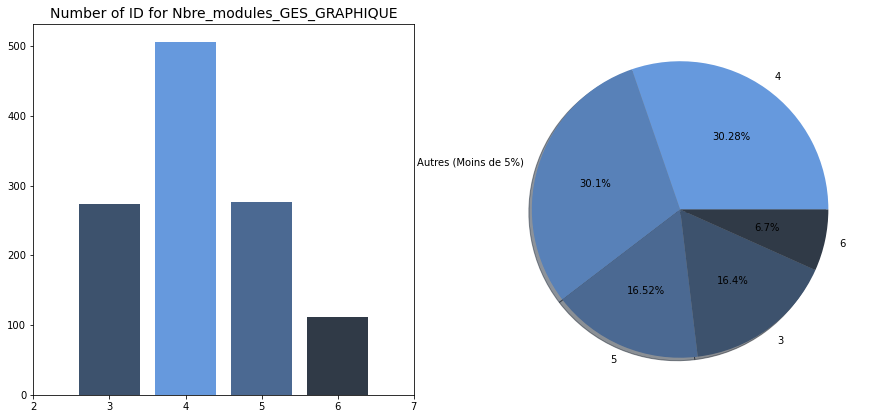

In [16]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("Number of ID for Nbre_modules_GES_GRAPHIQUE", fontsize=14)
plt.bar(x = DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"].value_counts().index,
        height = DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"].value_counts().values,
        color = sns.dark_palette("#69d", reverse=True));
plt.xlim([2, 7])

plt.subplot(222)
plt.pie(x = DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"].value_counts(), labels = [DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"].value_counts().index[0], "Autres (Moins de 5%)",
                                                                 DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"].value_counts().index[2], DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"].value_counts().index[3],
                                                                 DSN_Transpose_TEMP["Nbre_modules_GES_GRAPHIQUE"].value_counts().index[4]]
                                                     ,
           colors = sns.dark_palette("#69d", reverse=True),
           autopct = lambda x: str(round(x, 2)) + '%',
           shadow = True);

Les organisations présentent dans la BDD remplissent généralement 3, 4, 5 ou 6 modules GES. Les autres modules ne dépassent pas 5% d'effectifs. En moyenne, 30,28% des organisations remplissent 4 modules GES, 16,52% remplissent 5 modules. Autrement dit, 30,1% des organisations remplisents un nombre différents de modules. Pour rappel, il y a 23 modules GES !    

#### b. Variables - Type organisation

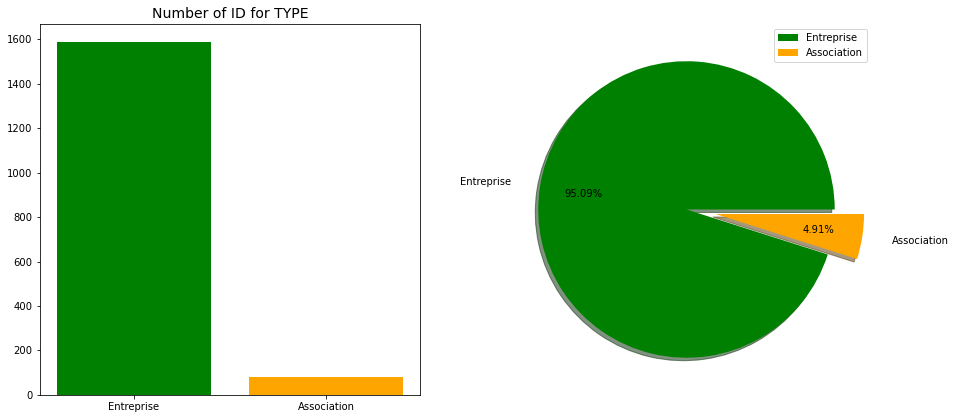

In [17]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("Number of ID for TYPE", fontsize=14)
plt.bar(x=DSN_Transpose_TEMP["type"].value_counts().index,
        height=DSN_Transpose_TEMP["type"].value_counts().values,
        color = ['green', 'orange']);


plt.subplot(222)
plt.pie(x = DSN_Transpose_TEMP["type"].value_counts(), labels = [DSN_Transpose_TEMP["type"].value_counts().index[0],
                                                     DSN_Transpose_TEMP["type"].value_counts().index[1]],
           colors = ['green', 'orange'],
           explode = [0, 0.2],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True)
plt.legend();

Les Entreprises sont majoritairements présentent dans la BDD. Moins de 5% (4,91%) sont des associations. 

#### c. Variables - Consolidation organisation

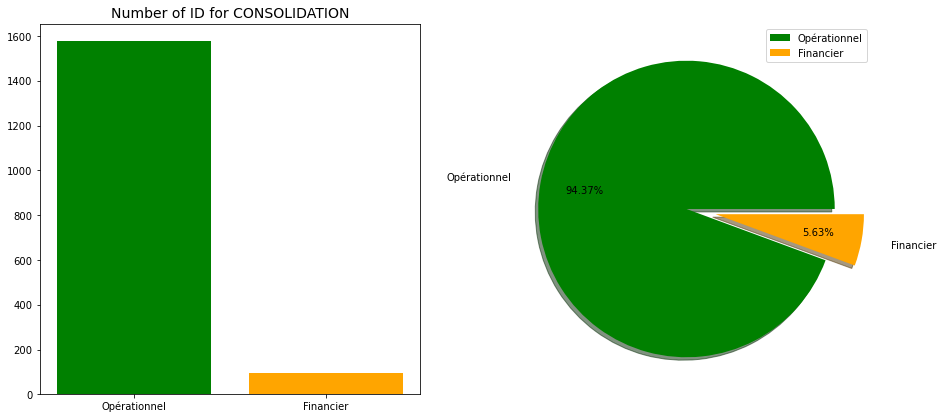

In [18]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("Number of ID for CONSOLIDATION", fontsize=14)
plt.bar(x=DSN_Transpose_TEMP["consolidation"].value_counts().index,
        height=DSN_Transpose_TEMP["consolidation"].value_counts().values,
        color = ['green', 'orange']);


plt.subplot(222)
plt.pie(x = DSN_Transpose_TEMP["consolidation"].value_counts(), labels = [DSN_Transpose_TEMP["consolidation"].value_counts().index[0], 
                                                                          DSN_Transpose_TEMP["consolidation"].value_counts().index[1]],
           colors = ['green', 'orange'],
           explode = [0, 0.2],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True)
plt.legend();

Les Organistions opérationnel sont majoritairements présentent dans la BDD. 5,63% des organisations sont financiers. 

#### d. Variables - Année de creation du bilan GES

*COMMENTAIRES :*      
*Essayons de mieux optimiser la représentation graphique, en limitant le nombre d'année et en représenntant uniquement les stratification qui sont significatives bien alimentés. Les autres modules les regrouper dans une stratification '9999'*


In [19]:
DSN_Transpose_TEMP = DSN_Transpose.copy()  
DSN_Transpose_TEMP["annee_ret"] = DSN_Transpose_TEMP["annee"]
DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['annee_ret'] == "2010", "annee_ret"] = "9999"
DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['annee_ret'] == "2012", "annee_ret"] = "9999"
DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['annee_ret'] == "2013", "annee_ret"] = "9999"
DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['annee_ret'] == "2011", "annee_ret"] = "9999"
DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['annee_ret'] == "2020", "annee_ret"] = "9999"

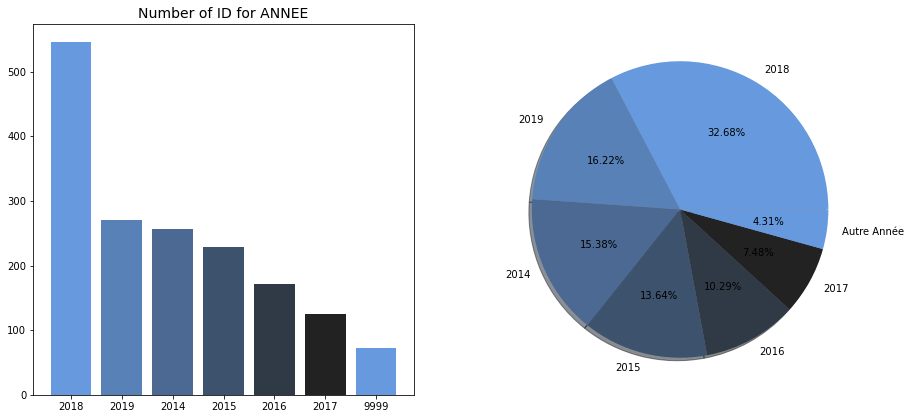

In [20]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("Number of ID for ANNEE", fontsize=14)
plt.bar(x=DSN_Transpose_TEMP["annee_ret"].value_counts().index,
        height=DSN_Transpose_TEMP["annee_ret"].value_counts().values,
        color = sns.dark_palette("#69d", reverse=True));


plt.subplot(222)
plt.pie(x = DSN_Transpose_TEMP["annee_ret"].value_counts(), labels = [DSN_Transpose_TEMP["annee_ret"].value_counts().index[0], DSN_Transpose_TEMP["annee_ret"].value_counts().index[1],
                                                    DSN_Transpose_TEMP["annee_ret"].value_counts().index[2], DSN_Transpose_TEMP["annee_ret"].value_counts().index[3],
                                                    DSN_Transpose_TEMP["annee_ret"].value_counts().index[4], DSN_Transpose_TEMP["annee_ret"].value_counts().index[5],
                                                    "Autre Année"],
           colors = sns.dark_palette("#69d", reverse=True),
           autopct = lambda x: str(round(x, 2)) + '%',
           shadow = True);

Les organisations ont majoritairement rempli les emissions GES sur le site de l'ADEME en 2018 - 32,68%. Moins de 5% des organisations ont rempli leur GES une autre année que celles qui figurent au-dessus 

#### e. Variables - Nombre modules GES renseingnée, focus SCOPE 1

*COMMENTAIRES :*     
*Essayons de mieux optimiser la représentation graphique, en limitant le nombre de modules et en représenntant uniquement les modules qui sont significatives bien alimentés. Les autres modules les regrouper dans un module 'Autres'* 


In [21]:
DSN_Transpose_TEMP = DSN_Transpose.copy() 
DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"] = DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1"]
for i in range(0,9):
    if i == 1 or i == 2 or i == 3 or i == 4 :
        continue
    DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['Nbre_modules_GES_SCOPE_1_GRAPHIQUE'] == i, "Nbre_modules_GES_SCOPE_1_GRAPHIQUE"] = 99

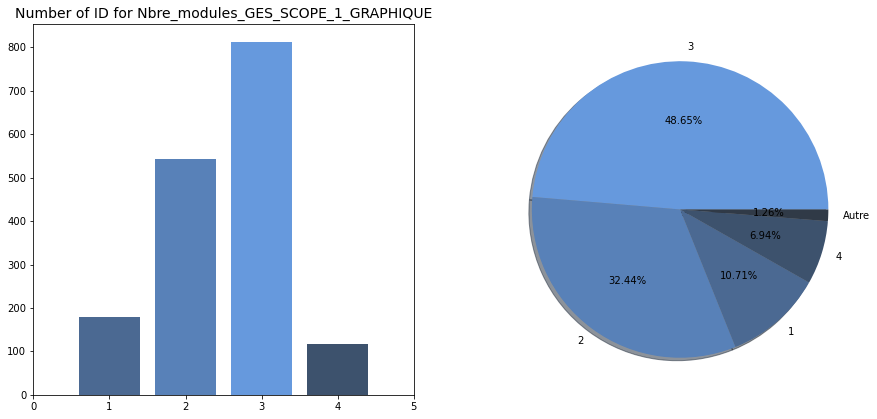

In [22]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("Number of ID for Nbre_modules_GES_SCOPE_1_GRAPHIQUE", fontsize=14)
plt.bar(x=DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"].value_counts().index,
        height=DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"].value_counts().values,
        color = sns.dark_palette("#69d", reverse=True))
plt.xlim([0, 5])

plt.subplot(222)
plt.pie(x = DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"].value_counts(), labels = [DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"].value_counts().index[0], 
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"].value_counts().index[1],
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"].value_counts().index[2], 
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_1_GRAPHIQUE"].value_counts().index[3],
                                                    "Autre"],
           colors = sns.dark_palette("#69d", reverse=True),
           autopct = lambda x: str(round(x, 2)) + '%',
           shadow = True);

#plt.legend();

Les organisations ont majoritairement rempli le scope 1 avec 3 modules, près de 50%. Pour rappel, le nombre de modules dans le SCOPE 1 est de 5. Il existe des organisations qui n'ont renseigné aucun SCOPE 1 !

#### f. Variables - Nombre modules GES renseingnée, focus SCOPE 2

In [23]:
DSN_Transpose_TEMP = DSN_Transpose.copy() 
DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2_GRAPHIQUE"] = DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2"]

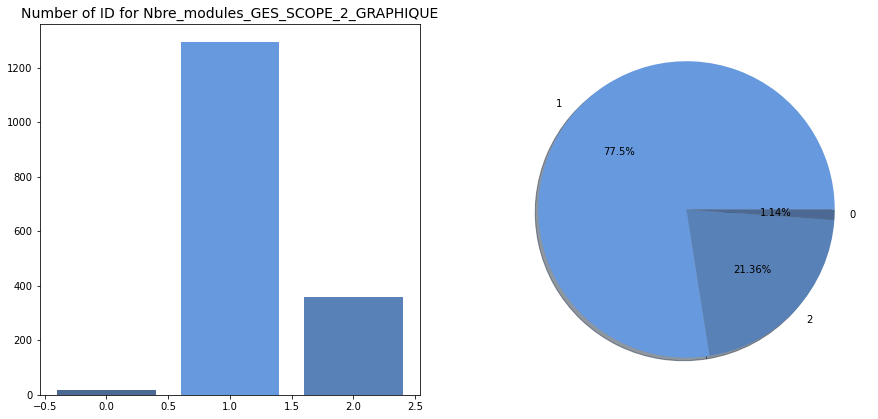

In [24]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("Number of ID for Nbre_modules_GES_SCOPE_2_GRAPHIQUE", fontsize=14)
plt.bar(x=DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2_GRAPHIQUE"].value_counts().index,
        height=DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2_GRAPHIQUE"].value_counts().values,
        color = sns.dark_palette("#69d", reverse=True))


plt.subplot(222)
plt.pie(x = DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2_GRAPHIQUE"].value_counts(), labels = [DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2_GRAPHIQUE"].value_counts().index[0], 
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2_GRAPHIQUE"].value_counts().index[1],
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_2_GRAPHIQUE"].value_counts().index[2]],
           colors = sns.dark_palette("#69d", reverse=True),
           autopct = lambda x: str(round(x, 2)) + '%',
           shadow = True);

Les organisations ont majoritairement rempli le scope 2 avec 1 module, 77,5%. Pour rappel, le nombre de modules dans le SCOPE 2 est de 2. Il existe des organisations qui n'ont renseigné aucun SCOPE 2 ! Néanmoins 98,8% des organisations ont rempli au moins 1 module dans le SCOPE 2

#### g. Variables - Nombre modules GES renseingnée, focus SCOPE 3

In [25]:
DSN_Transpose_TEMP = DSN_Transpose.copy() 
DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"] = DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3"]

for modules_scope3 in range(0,17):
    if modules_scope3 == 0 or modules_scope3 == 1 or modules_scope3 == 2 or modules_scope3 == 7 or modules_scope3 == 8  :
        continue
    DSN_Transpose_TEMP.loc[DSN_Transpose_TEMP['Nbre_modules_GES_SCOPE_3_GRAPHIQUES'] == modules_scope3, "Nbre_modules_GES_SCOPE_3_GRAPHIQUES"] = 99

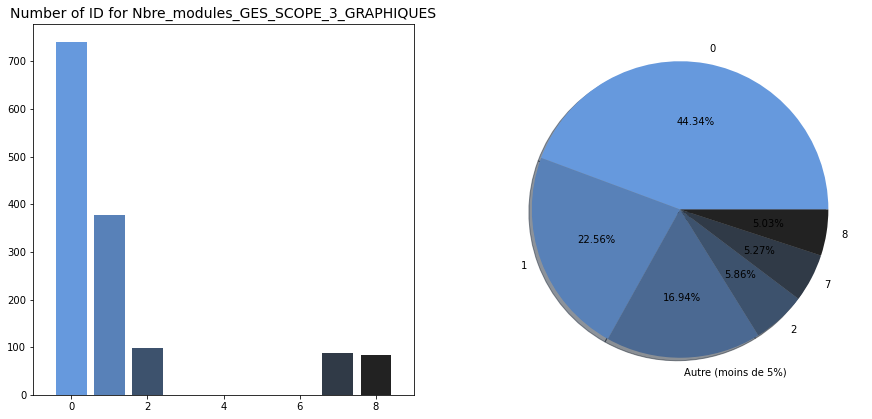

In [26]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("Number of ID for Nbre_modules_GES_SCOPE_3_GRAPHIQUES", fontsize=14)
plt.bar(x=DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts().index,
        height=DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts().values,
        color = sns.dark_palette("#69d", reverse=True))
plt.xlim([-1, 9])

plt.subplot(222)
plt.pie(x = DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts(), labels = [DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts().index[0], 
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts().index[1],
                                                                                    "Autre (moins de 5%)",
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts().index[3],
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts().index[4], 
                                                                                    DSN_Transpose_TEMP["Nbre_modules_GES_SCOPE_3_GRAPHIQUES"].value_counts().index[5]],
           colors = sns.dark_palette("#69d", reverse=True),
           autopct = lambda x: str(round(x, 2)) + '%',
           shadow = True);

#plt.legend();

Les organisations ont majoritairement rempli AUCUN scope 3. Pour rappel, le nombre de modules dans le SCOPE 3 est de 16. Pourquoi SCOPE 3 aussi mal renseingé ? Car la reglementation francaise (européenne ?) n'oblige pas de renseingé cette organisation contrairement aux SCOPE 1 et SCOPE 2

<br> 
&#10067; **HYPOTHESE** &#10067;  
<br>
Pour la future modélisation nous allons nous intéresser uniquement aux SCOPE 1 et SCOPE 2. Le SCOPE 3 est peu renseigné et risque de fausser la modélisation. To do List : Réfléchir comment peut t on intégrer les données du SCOPE 3, potentiellement créer une variable 'oui' ou 'non' l'organisation a renseingé le module 3... 

<hr style = "border-width:2px;border-color:#c7cf00">
## **E. Table - INSEE**  &#127793; 
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

*COMMENTAIRES :*      
*Il serait intéressant en fonction du code NAF présente dans la BDD, de déduire la secteur d'activité de l'organisation. Pour facilement extraire cette informations nous récuperons depuis l'INSEE, une table qui repertoire par code NAF (2 premiers chiffres) le secteur d'activité et nous faisons une jointure avec la BDD*


In [27]:
code_naf = pd.read_excel('code_NAF_APEv2.xlsx')

code_naf["Deb"] = code_naf["Deb"].apply(str)

In [28]:
#préparation de la base 
DSN_Transpose["naf_ret"] = DSN_Transpose["naf"]
#on veut extraire uniquement les chiffres, utilisaition des regular expressions
DSN_Transpose['naf_ret'] = DSN_Transpose['naf_ret'].str.extract(r"([0-9]{4}[A-Z]{1})", expand= True)
#besoin d'uniquement les 2premiers chiffres
DSN_Transpose["Prems_NAF"] = DSN_Transpose["naf_ret"].astype(str).str[0:2]

#soucis sur l'excel qui ne reconnait pas le premier '0'
DSN_Transpose.loc[DSN_Transpose["Prems_NAF"]=="01","Prems_NAF"]="1"
DSN_Transpose.loc[DSN_Transpose["Prems_NAF"]=="08","Prems_NAF"]="8"

In [29]:
#merge
DSN_Transpose_Ajout_INSEE = DSN_Transpose.merge(code_naf, left_on="Prems_NAF", right_on='Deb')

*COMMENTAIRES :*     
*Essayons de mieux optimiser la représentation graphique, en limitant le nombre de Secteurs en représenntant uniquement les Secteurs qui sont significatives bien alimentés. Les autres modules les regrouper dans un Secteurs 'Autres'*


In [30]:
#TRansformer la variable Section en une variable plus facile à lire 
DSN_Transpose_Ajout_INSEE['Section_ret'] = DSN_Transpose_Ajout_INSEE['Section']

DSN_Transpose_Ajout_INSEE.loc[DSN_Transpose_Ajout_INSEE["Section_ret"] == "Industries extractives", "Section_ret"] = "Autre"
DSN_Transpose_Ajout_INSEE.loc[DSN_Transpose_Ajout_INSEE["Section_ret"] == "Enseignement", "Section_ret"] = "Autre"
DSN_Transpose_Ajout_INSEE.loc[DSN_Transpose_Ajout_INSEE["Section_ret"] == "Agriculture, sylviculture et pêche", "Section_ret"] = "Autre"
DSN_Transpose_Ajout_INSEE.loc[DSN_Transpose_Ajout_INSEE["Section_ret"] == "Production et distribution d'électricité, de gaz, de vapeur et d'air conditionné", "Section_ret"] = "Autre"
DSN_Transpose_Ajout_INSEE.loc[DSN_Transpose_Ajout_INSEE["Section_ret"] == "Autres activités de services", "Section_ret"] = "Autre"
DSN_Transpose_Ajout_INSEE.loc[DSN_Transpose_Ajout_INSEE["Section_ret"] == "Arts, spectacles et activités récréatives", "Section_ret"] = "Autre"


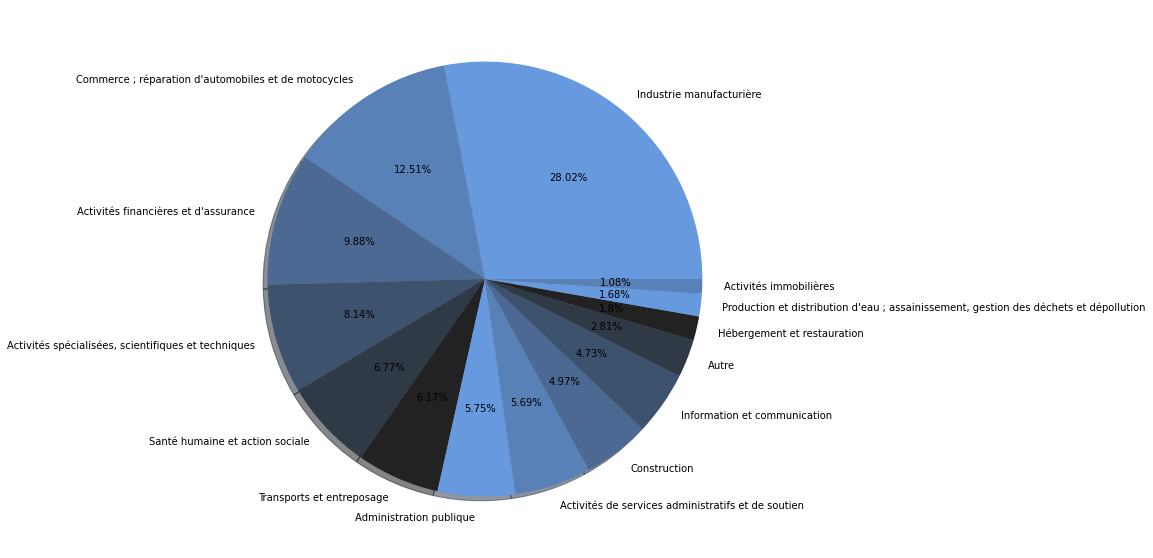

In [31]:
fig = plt.figure(figsize=(10,10))

plt.pie(x = DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts(), labels = [DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[0], DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[1],
                                                                     DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[2], DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[3],
                                                                     DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[4], DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[5],
                                                                     DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[6], DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[7],
                                                                     DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[8], DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[9],
                                                                     DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[10], DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[11],
                                                                     DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[12], DSN_Transpose_Ajout_INSEE["Section_ret"].value_counts().index[13]],
           colors = sns.dark_palette("#69d", reverse=True),
           autopct = lambda x: str(round(x, 2)) + '%',
           shadow = True);

Le secteur le plus représenté est le secteur de l'industrie manufacturière puis viennent les commerces;répartations auto... 

<hr style = "border-width:2px;border-color:#c7cf00">
## **F. Modélisation**  &#127793; 
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

>- Pourquoi la régression linéaire ?
>
>La régression linéaire est un outil fondamental qui présente des avantages distincts par rapport aux autres algorithmes. En raison de sa **simplicité**, il s'agit d'un algorithme rapide à entraîner, ce qui en fait généralement un bon algorithme de base pour les scénarios de régression courants.

`"Vérifier les hypothèses du modèle, c'est comme commenter du code."` - Mon prof d'Econométrie  
Parfois elle est **négligée** dans la réalité. Un échec à faire l'un ou l'autre peut entraîner beaucoup de **confusion** et peut avoir des conséquences assez graves du fait que le modèle **n'est pas interprété correctement**.

L'idée est d'ajuster une ligne droite dans l'espace à n dimensions qui contient tous nos points d'observation. Cela constituerait la formation d'une équation de la forme **y = mx + c**. Parce que nous avons plusieurs variables, nous pourrions avoir besoin d'étendre cela **mx** à **m<sub>1</sub>x<sub>1</sub>**, **m<sub>2</sub>x<sub>2</sub>** etc. Nous avons ainsi une représentation mathématique de l'ordre : 

![eq](https://miro.medium.com/max/1160/0*rHldQA_34_1MunZ_.png)

where 

1. **y** = dependent variable
2. **x<sub>1</sub> to x<sub>n</sub>** dependent variables
3. **b<sub>0</sub> to b<sub>n</sub>** coeff

Un modèle de régression linéaire se fonde sur les hypothèses suivantes:

1. Linearity
2. Homoscedasticity
3. Multivariate normality
4. Independence of errors
5. Lack of multicollinearity

Si ces hypothèses ne tiennent pas, la régression linéaire n'est probablement pas le modèle de votre problème.

*COMMENTAIRES :*      
*Pour faire un modèle, nous avons besoin d'une variable à prédire. Pour l'instant intéressons nous à la SOMME des SCOPE 1 et SCOPE 2. Au vu des analyse précédentes le SCOPE 3 est peu renseigné et ainsi risque de fausser nos prédictions. Nous prenons comme hypothèses de s'intéresser uniquement aux SCOPE 1 et 2. Puis complexifions la modélisationn si le model précédent est trop simpliste* 

#### a. Variables - Sommes des modules du SCOPE 1

In [32]:
#sum scope 1
DSN_TEMP = DSN_Transpose_Ajout_INSEE.copy()  
DSN_TEMP = DSN_TEMP[["Emissions directes des sources fixes de combustion","Emissions directes des sources mobiles à moteur thermique",
             "Emissions directes des procédés hors énergie","Emissions directes fugitives",
             "Emissions issues de la biomasse (sols et forêts)"]]

DSN_TEMP["SUM_SCOPE1"] = DSN_TEMP.sum(axis=1)

new = DSN_TEMP["SUM_SCOPE1"]
DSN_Transpose_Ajout_INSEE = pd.merge(DSN_Transpose_Ajout_INSEE, new, left_index=True, right_index=True)

#### b. Variables - Sommes des modules du SCOPE 2

In [33]:
#sum scope 2
DSN_TEMP = DSN_Transpose_Ajout_INSEE.copy()   
DSN_TEMP = DSN_TEMP[["Emissions indirectes liées à la consommation d'électricité", "Emissions indirectes liées à la consommation de vapeur, chaleur ou froid"]]

DSN_TEMP["SUM_SCOPE2"] = DSN_TEMP.sum(axis=1)

new = DSN_TEMP["SUM_SCOPE2"]
DSN_Transpose_Ajout_INSEE = pd.merge(DSN_Transpose_Ajout_INSEE, new, left_index=True, right_index=True)

#### c. Variables - Sommes des modules du SCOPE 2

In [34]:
#sum scope 3
DSN_TEMP = DSN_Transpose_Ajout_INSEE.copy()   
DSN_TEMP = DSN_TEMP[["Emissions liées à l'énergie non incluse dans les catégories « émissions directes de GES » et « émissions de GES à énergie indirectes »", "Emissions indirectes liées à la consommation de vapeur, chaleur ou froid",
            "Achats de produits ou services","Immobilisations de biens","Déchets","Transport de marchandise amont",
            "Déplacements professionnels", "Actifs en leasing amont","Investissements","Transport de visiteurs et de clients",
            "Transport de marchandise aval","Utilisation des produits vendus","Fin de vie des produits vendus",
            "Franchise aval","Leasing aval","Déplacements domicile travail","Autres émissions indirectes"]]

DSN_TEMP["SUM_SCOPE3"] = DSN_TEMP.sum(axis=1)

new = DSN_TEMP["SUM_SCOPE3"]
DSN_Transpose_Ajout_INSEE = pd.merge(DSN_Transpose_Ajout_INSEE, new, left_index=True, right_index=True)

#### d. Variables - Sommes des modules du SCOPE 1 et SCOPE 2

In [35]:
#sum scope 1 et 2
DSN_TEMP = DSN_Transpose_Ajout_INSEE.copy()  
DSN_TEMP = DSN_TEMP[["SUM_SCOPE1", "SUM_SCOPE2"]]

DSN_TEMP["SUM_SCOPE1_&_2"] = DSN_TEMP.sum(axis=1)

new = DSN_TEMP["SUM_SCOPE1_&_2"]
DSN_Transpose_Ajout_INSEE = pd.merge(DSN_Transpose_Ajout_INSEE, new, left_index=True, right_index=True)

#### e. Variables - Sommes des modules du SCOPE 1, SCOPE 2 et SCOPE 3

In [36]:
#sum scope 1 et 2 et 3
DSN_TEMP = DSN_Transpose_Ajout_INSEE.copy()  
DSN_TEMP = DSN_TEMP[["SUM_SCOPE1","SUM_SCOPE2", "SUM_SCOPE3"]]

DSN_TEMP["SUM_SCOPE1_&_2_&_3"] = DSN_TEMP.sum(axis=1)

new = DSN_TEMP["SUM_SCOPE1_&_2_&_3"]
DSN_Transpose_Ajout_INSEE = pd.merge(DSN_Transpose_Ajout_INSEE, new, left_index=True, right_index=True)

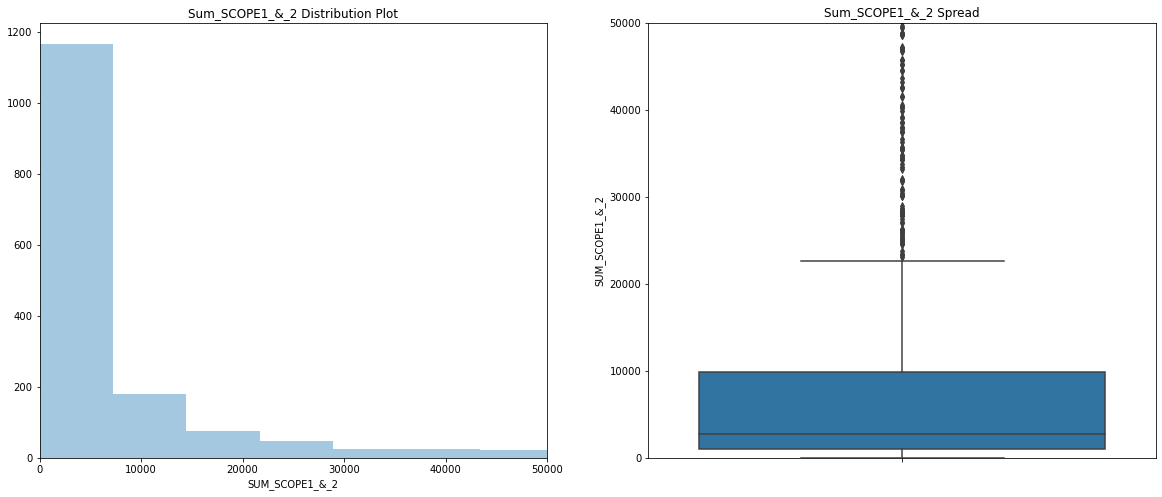

In [37]:
#graphique pour modélisation
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sum_SCOPE1_&_2 Distribution Plot')
ax = sns.distplot(DSN_Transpose_Ajout_INSEE["SUM_SCOPE1_&_2"], kde=False, bins=5000)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlim(0,50000) 
    
plt.subplot(1,2,2)
plt.title('Sum_SCOPE1_&_2 Spread')
ax=sns.boxplot(DSN_Transpose_Ajout_INSEE["SUM_SCOPE1_&_2"],
            orient="v")
plt.ylim(0,50000) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

Si nous essayons de modéliser la variable SOMME SCOPE 1 et SCOPE 2 nous allons trouver énormémement de difficulté de trouver des résultats pertinents voir cohérents. Pourquoi ? La variable cible est asymétrique à droite. Comme les modèles (linéaires) aiment les données normalement distribuées, nous devons transformer cette variable et la rendre plus normalement distribuée, utiliser le logarithme. Si les données ont de nombreuses valeurs extrêmes ou sont asymétriques, cette méthode permet de rendre vos données normales.
</div>

In [38]:
# mettre en logartihme
DSN_Transpose_Ajout_INSEE["LOG_SUM_SCOPE1_&_2"] = np.log(DSN_Transpose_Ajout_INSEE["SUM_SCOPE1_&_2"])

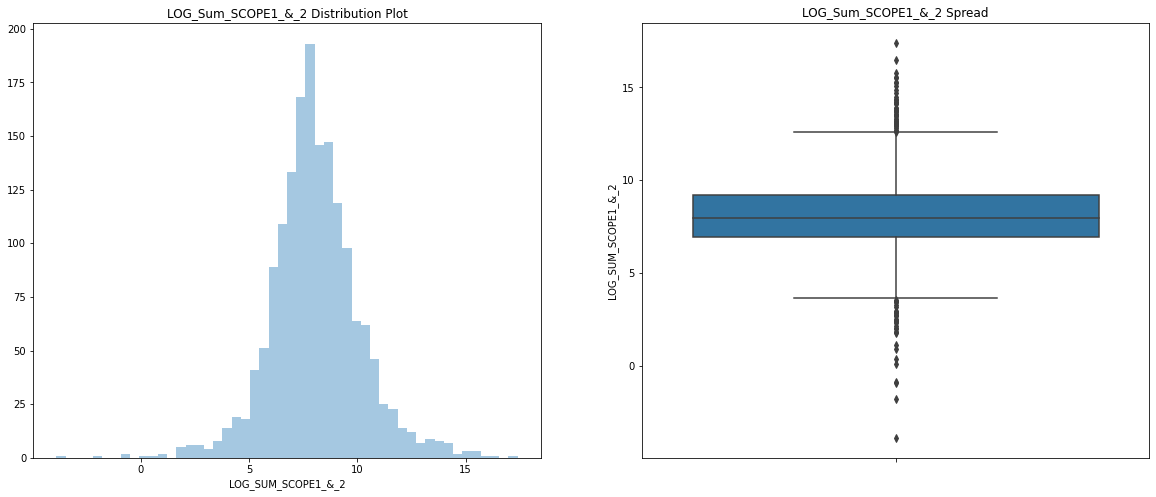

In [39]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('LOG_Sum_SCOPE1_&_2 Distribution Plot')
ax = sns.distplot(DSN_Transpose_Ajout_INSEE["LOG_SUM_SCOPE1_&_2"], kde=False)
    
plt.subplot(1,2,2)
plt.title('LOG_Sum_SCOPE1_&_2 Spread')
ax=sns.boxplot(DSN_Transpose_Ajout_INSEE["LOG_SUM_SCOPE1_&_2"],
            orient="v");

*COMMENTAIRES :*     
*La visualisation des données est utile pour nettoyer les données, explorer les données, détecter les valeurs aberrantes et les groupes inhabituels, identifier les tendances et les clusters, etc. Voici la liste des graphiques de visualisation des données pour repérer les valeurs aberrantes.*


<br> 
 &#10067; **HYPOTHESE** &#10067;  
<br>
<span style='color:red'>  Après avoir détecté la valeur aberrante, nous devons supprimer\traiter la valeur aberranteLes valeurs aberrantes affectent gravement la moyenne et l'écart type de l'ensemble de données. Ceux-ci peuvent statistiquement donner des résultats erronés.
* Il augmente la variance d'erreur et réduit la puissance des tests statistiques. 
<br>
<br>
Nous supprimons les 1% les plus élevé et plus faible des LOG(SOMME SCOPE 1 et SCOPE 2) 
</span>

In [40]:
#filtre
DSN_filtre = DSN_Transpose_Ajout_INSEE[DSN_Transpose_Ajout_INSEE["LOG_SUM_SCOPE1_&_2"]>2.72]
DSN_filtre = DSN_filtre[DSN_filtre["LOG_SUM_SCOPE1_&_2"]<14.12]

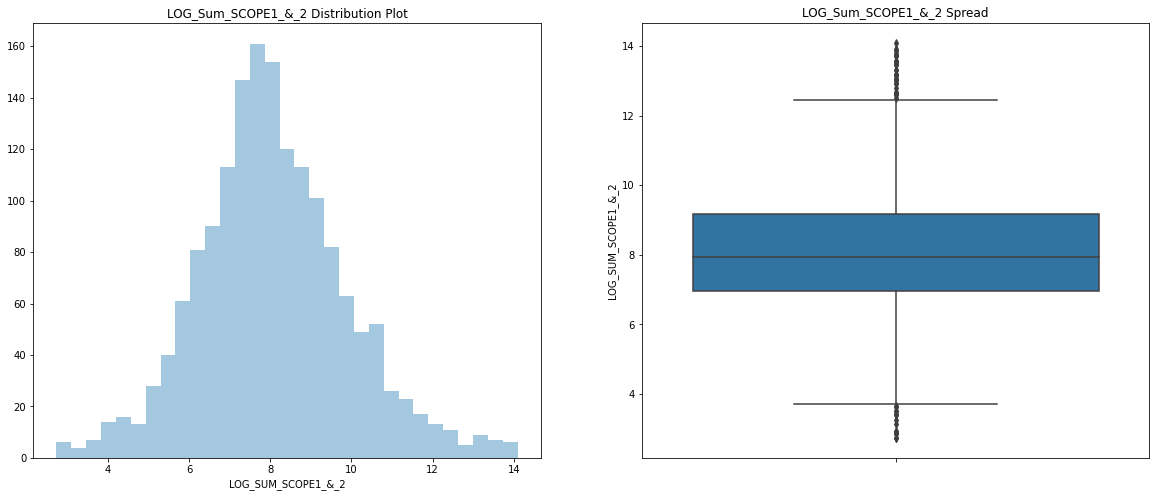

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('LOG_Sum_SCOPE1_&_2 Distribution Plot')
ax = sns.distplot(DSN_filtre["LOG_SUM_SCOPE1_&_2"], kde=False)
    
plt.subplot(1,2,2)
plt.title('LOG_Sum_SCOPE1_&_2 Spread')
ax=sns.boxplot(DSN_filtre["LOG_SUM_SCOPE1_&_2"],
            orient="v");

In [42]:
print("Ainsi j'ai dans la BDD :", DSN_filtre.shape[0],"organisations")

Ainsi j'ai dans la BDD : 1632 organisations


#### f. Variables - Dummy et qualitatives Effectifs / Secteurs / Consolidation et Type

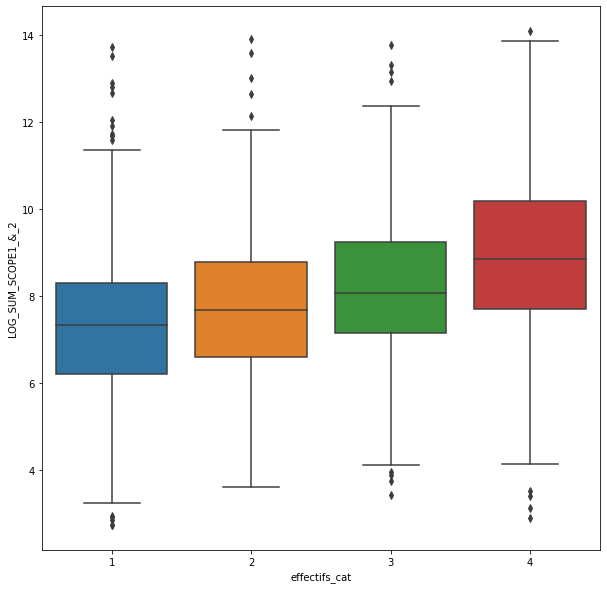

In [43]:
labels_5 = [1, 2, 3, 4]
DSN_filtre['effectifs_cat'] = pd.qcut(DSN_filtre['effectifs'], q=4, labels=labels_5)
DSN_filtre['effectifs_cat_infos'] = pd.qcut(DSN_filtre['effectifs'], q=4)

plt.figure(figsize=(10,10))
ax=sns.boxplot(x=DSN_filtre['effectifs_cat'],
               y=DSN_filtre["LOG_SUM_SCOPE1_&_2"],
            orient="v");

*COMMENTAIRES :*     
*Transformer la variable effectifs en une variable qualitatives, le choix a été porté a 4 classes, nous remarquons une bonne distinction du LOG(SOMME des SCOPE 1 et SCOPE 2) selon les classes. Plus l'effectif est conséquent et plus les émissions de GES sont importants*


*COMMENTAIRES :**Essayons de mieux optimiser la représentation graphique, en limitant le nombre de secteurs et en représenntant uniquement les modules qui sont significatives bien alimentés. Les autres secteurs les regrouper dans un module 'Autres'*


In [44]:
lb_make = LabelEncoder()
DSN_filtre['Section_cat'] = lb_make.fit_transform(DSN_filtre['Section'])

DSN_filtre['consolidation_cat'] = lb_make.fit_transform(DSN_filtre['consolidation'])
DSN_filtre['type_cat'] = lb_make.fit_transform(DSN_filtre['type'])

In [45]:
# Quantité maximale
max_qty = lambda AA: AA.max()

# Quantité minimale
min_qty = lambda AA: AA.min()

# Quantité médiane
median_qty = lambda AA : AA.median()

# Quantité médiane
moyenne_qty = lambda AA : AA.mean()

# Quantité médiane
count_qty = lambda AA : AA.count()

# frequence sur les modalités de section
functions_to_apply = {
'Section_cat' : [count_qty]
}
qty_groupby = DSN_filtre.groupby('Section_cat').agg(functions_to_apply)

sum_tot = qty_groupby.sum()["Section_cat"]["<lambda>"]
sum_tot

qty_groupby["Percetage_of_tot"]= qty_groupby["Section_cat"]["<lambda>"] / sum_tot * 100

In [46]:
qty_groupby

,Section_cat,Percetage_of_tot
,<lambda>,
Section_cat,,
0,89,5.453431
1,164,10.049020
2,18,1.102941
3,132,8.088235
4,94,5.759804
5,5,0.306373
6,5,0.306373
7,16,0.980392


In [47]:
# Secteur Autre pour les modalités non significatives
DSN_filtre.loc[DSN_filtre["Section_cat"]==2,"Section_cat"]=2 #Information et communication
DSN_filtre.loc[DSN_filtre["Section_cat"]==5,"Section_cat"]=2 #Agriculture, sylviculture et pêche
DSN_filtre.loc[DSN_filtre["Section_cat"]==6,"Section_cat"]=2 #Arts, spectacles et activités récréatives
DSN_filtre.loc[DSN_filtre["Section_cat"]==7,"Section_cat"]=2 #Autres activités de services
DSN_filtre.loc[DSN_filtre["Section_cat"]==10,"Section_cat"]=2 #Enseignement
DSN_filtre.loc[DSN_filtre["Section_cat"]==11,"Section_cat"]=2 #Hébergement et restauration
DSN_filtre.loc[DSN_filtre["Section_cat"]==13,"Section_cat"]=2 #Industries extractives
DSN_filtre.loc[DSN_filtre["Section_cat"]==14,"Section_cat"]=2 #Information et communication
DSN_filtre.loc[DSN_filtre["Section_cat"]==15,"Section_cat"]=2 #Production et distribution d'ea
DSN_filtre.loc[DSN_filtre["Section_cat"]==16,"Section_cat"]=2 #Production et distribution d'électricité

*COMMENTAIRES :*      
*La variable comporte néanmoins un nombre de modalité conséquent, 14 secteurs après avoir créer le secteur Autre. Nous devons trouver un moyen de pouvoir facilement regrouper les secteurs en fonction de la moyenne, de la distribtuions... Pour cela 2 fonctions ont été créé.* 


In [48]:
#savoir si 2 variables ont une distribution simialires 
def ttest_for_same_mean(base, var1, var2):
    '''Il peut être utilisé notamment pour tester statistiquement l’hypothèse d’égalité de
    deux moyennes avec deux échantillons base pour la BDD var1 que nous voulons tester et var2 la variable cible. 
    La fonction nous sort une variable RES compare var1 et var2 et en fonction de p-value,
    nous indique si d apres le ttest les variables ont la meme moyenne 
    H0 : moyennes de population égales H1 : moyennes de population inégales'''

    d=[]
    e=[]
    f=[]    

    for i in base[var1].unique():
        for j in base[var1].unique():
            if i == j:
                continue
            else:
                d.append(i)
                e.append(j)
                Section_sec_i = base[base[var1]==i]
                Section_sec_j = base[base[var1]==j]

                ttest = stats.ttest_ind(Section_sec_i[var2],
                    Section_sec_j[var2])[1]
                if ttest > 0.05:
                    res = "SAME MEAN"
                    f.append(res)
                else:
                    res = "DIFF MEAN"
                    f.append(res)
    d_dataframe = pd.DataFrame(d,columns=['Valeur i'])
    e_dataframe = pd.DataFrame(e,columns=['Valeur j'])
    f_dataframe = pd.DataFrame(f,columns=['RES'])

    d_e_dataframe = pd.merge(d_dataframe, e_dataframe, left_index=True, right_index=True)
    dataframe_merge = pd.merge(d_e_dataframe, f_dataframe, left_index=True, right_index=True)

    same_moy = dataframe_merge[dataframe_merge['RES']=="SAME MEAN"]
    
    return same_moy

In [49]:
#savoir si 3 variables ont la meme distribtuion
def KW_test_for_same_mean(base, var1, var2):
    '''Le test H de Kruskal-Wallis teste l'hypothèse nulle selon laquelle la médiane de la population 
    de tous les groupes est égale. Il s'agit d'une version non paramétrique de l'ANOVA.
    Le test fonctionne sur 2 échantillons indépendants ou plus, qui peuvent avoir des tailles différentes.
    H0 : moyennes de population égales H1 : moyennes de population inégales'''    
    c=[]
    d=[]
    e=[]
    f=[]
    g=[] 
    h=[]
    for i in base[var1].unique():
        for j in base[var1].unique():
            for k in base[var1].unique():
                if i == j or i ==k or j==k:
                    continue
                else:
                    d.append(i)
                    e.append(j)
                    f.append(k)
                    Section_sec_i = base[base[var1]==i]
                    Section_sec_j = base[base[var1]==j]
                    Section_sec_k = base[base[var1]==k]
                    stat, p = kruskal(Section_sec_i[var2], Section_sec_j[var2], Section_sec_k[var2])
                    if p > 0.05:
                        res = "SAME MEAN"
                        g.append(res)
                        h.append(p)
                    else:
                        res = "DIFF MEAN"
                        g.append(res)
                        h.append(p)                        
    d_dataframe = pd.DataFrame(d,columns=['Valeur i'])
    e_dataframe = pd.DataFrame(e,columns=['Valeur j'])
    f_dataframe = pd.DataFrame(f,columns=['Valeur k'])
    g_dataframe = pd.DataFrame(g,columns=['RES'])
    h_dataframe = pd.DataFrame(h,columns=['P-value'])

    d_e_dataframe = pd.merge(d_dataframe, e_dataframe, left_index=True, right_index=True)
    d_e_f_dataframe = pd.merge(d_e_dataframe, f_dataframe, left_index=True, right_index=True)
    d_e_f_h_dataframe = pd.merge(d_e_f_dataframe, h_dataframe, left_index=True, right_index=True)
    dataframe_merge = pd.merge(d_e_f_h_dataframe, g_dataframe, left_index=True, right_index=True)

    same_moy = dataframe_merge[dataframe_merge['RES']=="SAME MEAN"]

    return same_moy

In [50]:
same_moy1 = ttest_for_same_mean(DSN_filtre, "Section_cat", "LOG_SUM_SCOPE1_&_2")
same_moy1

,Valeur i,Valeur j,RES
2,12,18,SAME MEAN
10,17,2,SAME MEAN
14,17,1,SAME MEAN
16,17,3,SAME MEAN
19,2,17,SAME MEAN
25,2,3,SAME MEAN
27,18,12,SAME MEAN
44,0,4,SAME MEAN
51,8,9,SAME MEAN
55,1,17,SAME MEAN


In [51]:
DSN_filtre.loc[DSN_filtre["Section_cat"]==12,"Section_cat"]=18 #Industrie manufacturière + Transports et entreposage
DSN_filtre.loc[DSN_filtre["Section_cat"]==17,"Section_cat"]=1 #Santé humaine et action sociale + Activités financières et d'assurance
DSN_filtre.loc[DSN_filtre["Section_cat"]==3,"Section_cat"]=2 #Activités spécialisées, scientifiques et techn + Information et communication
DSN_filtre.loc[DSN_filtre["Section_cat"]==0,"Section_cat"]=4 #Activités de services administratifs + Administration publique
DSN_filtre.loc[DSN_filtre["Section_cat"]==8,"Section_cat"]=9 #Commerce ; réparation d'automobiles + Construction

In [52]:
same_moy1 = ttest_for_same_mean(DSN_filtre, "Section_cat", "LOG_SUM_SCOPE1_&_2")
same_moy1

,Valeur i,Valeur j,RES


*COMMENTAIRES :*
*Nous avons regrouper tous les secteurs qui ont une moyenne similaire selon le ttest et/ou KW test* 
</span>

In [53]:
MODEL_BASELINE = DSN_filtre.copy()

In [54]:
###créer les variables dummy pour le modèle
dummies = pd.get_dummies(MODEL_BASELINE['Section_cat']).rename(columns=lambda x: 'Dummy_Section_cat_' + str(x))
MODEL_BASELINE = pd.concat([MODEL_BASELINE, dummies], axis=1)

dummies = pd.get_dummies(MODEL_BASELINE['effectifs_cat']).rename(columns=lambda x: 'Dummy_effectifs_cat_3_' + str(x))
MODEL_BASELINE = pd.concat([MODEL_BASELINE, dummies], axis=1)

In [55]:
y = MODEL_BASELINE[["LOG_SUM_SCOPE1_&_2"]]
x = MODEL_BASELINE[["Dummy_Section_cat_1","Dummy_Section_cat_2","Dummy_Section_cat_9","Dummy_Section_cat_18",
               "Dummy_effectifs_cat_3_2", "Dummy_effectifs_cat_3_3", "Dummy_effectifs_cat_3_4"]]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [57]:
lr = LinearRegression()

# Entraînement du modèle
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

In [59]:
X = sm.add_constant(X_train)

model = sm.OLS(y_train, X.astype(float))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     LOG_SUM_SCOPE1_&_2   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     91.13
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          4.44e-108
Time:                        21:51:02   Log-Likelihood:                -2389.3
No. Observations:                1305   AIC:                             4795.
Df Residuals:                    1297   BIC:                             4836.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Variable Cible : LOG_SUM_SCOPE1_&_2
<br>
D'après nos connaissances, le R2 du modèle : 33%, R2 ajusté : 32,8%. Durbin Watson : OK, F-stats : OK 
<br>
Toutes les variables sont significatives, p-value inférieur à 5%.
<br>
<br>
Interprétation résultat : Par rapport à la variable Dummy_effectifs_cat_3_1, Dummy_effectifs_cat_3_4 provoque 1,8x plus d'emissions GES. Par rapport à la variable Dummy_Section_cat_4, Dummy_Section_cat_18 provoque 2,4x plus d'emissions GES
Regardons les hypothèses de la régression linéaire si elles sont vérifiées

In [60]:
def calculate_residuals(model, features, label, x_model):
    """
    Créé des prédictions avec le modèle et calcule les résidus
    """
    predictions = model.predict(features)
    z = label.reset_index()
    t = pd.DataFrame(predictions, columns = ['Predicted'])
    df_results = pd.merge(z, t, left_index=True, right_index=True)
    df_results['Residuals'] = abs(df_results[x_model]) - abs(df_results['Predicted'])
    
    return df_results
def linear_assumption(model, features, label,x_model):
    """
    Linéarité: suppose qu'il existe une relation linéaire entre les prédicteurs et
                la variable de réponse. Sinon, un terme quadratique ou un autre
                l'algorithme doit être utilisé.
    """
    print('Assumption 1: Relation linéaire entre la varaible cible et la predit', '\n')
        
    print('Nuage de points réel vs prédit.',
           'Les prédictions doivent suivre la ligne diagonale.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label,x_model)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x=x_model, y='Predicted', data=df_results, fit_reg=False, height=7)
        
    # Plotting the diagonal line
#     plt.plot([df_results.min()["LOG_SUM_SCOPE1_&_2"],df_results.max()["LOG_SUM_SCOPE1_&_2"]],[df_results.min()["Predicted"],df_results.max()["Predicted"]],  # X and y points
#              color='darkorange', linestyle='--');

    plt.plot([6,10],[6,10],  # X and y points
             color='darkorange', linestyle='--');
    plt.title('Actual vs. Predicted')
    plt.show()
def normal_errors_assumption(model, features, label,x_model, p_value_thresh=0.05):
    """
    Normalité: suppose que les termes d'erreur sont normalement distribués. S'ils ne le sont pas,
     des transformations non linéaires de variables peuvent résoudre ce problème.
               
     Cette hypothèse violée provoque principalement des problèmes avec les intervalles de confiance
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: Les résidus noramalement distribué', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label, x_model)
    
    print('Test de normalité Anderson-Darling')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('Si la p-value du test - alpha > 0.05 alors les résidus peuvent etre normalement distribué:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Résidus NON normalement dsitribué')
    else:
        print('Résidus normalement dsitribué')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print('-'*50)
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Des problèmes avec les intervalles de confiance peuvent apparaitre')
        print('Des transformations non linéaires de variables peuvent résoudre ce problème.')
        
    print(50*'-')
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Suppose que les prédicteurs ne sont pas corrélés les uns aux autres. S'il y a
                        corrélation entre les prédicteurs, puis soit supprimer les prédicteurs à
                        Valeurs du facteur d'inflation de variance (VIF) ou effectuer une réduction de dimensionnalité
                           
                        Cette hypothèse violée entraîne des problèmes d'interprétabilité du
                        coefficients et les erreurs types des coefficients (coefficeint significative alors qu'en réalité il ne l'ai pas.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Multicollinearité ','\n')
        
    # Plotting the heatmap
    #plt.figure(figsize = (10,8))
    #sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)

    #plt.title('Correlation of Variables')
    #plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: Une Multicollinearité subsiste - moyenne')
    print('> 100: Une Multicollinearité subsiste - forte')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    
    df = pd.DataFrame(features)

    dt = df.values
    dt = dt.astype('float32')

    VIF = pd.Series([variance_inflation_factor(dt, i) 
                   for i in range(dt.shape[1])], 
                   index=df.columns)
    VIF = pd.DataFrame(VIF)

    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(VIF[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF[0] if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF[0] if vif > 100])
    print()
    print('{0} nb de variables avec prb de multicollinearité'.format(possible_multicollinearity))
    print('{0} nb de variables avec prb de multicollinearité'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Interprétabilité des coefficients peut etre difficile, voir erroné')
            print('Il faudrait enlever certaine variables avec une grande Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Interprétabilité des coefficients peut etre difficile, voir erroné')
        print('Il faudrait enlever certaine variables avec une grande Variance Inflation Factor (VIF)')

def autocorrelation_assumption(model, features, label, x_model):
    """
    Autocorrelation: Suppose qu'il n'y a pas d'autocorrélation dans les résidus. S'il y a
                      autocorrélation, alors il y a un modèle qui n'est pas expliqué en raison de
                      la valeur actuelle dépend de la valeur précédente. 
                      Cela peut être résolu en ajoutant une variable de retard de la variable dépendante
                      variable ou certains des prédicteurs.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label, x_model)

    print('\n Durbin-Watson Test')
    print('Si Valeur d est 1.5 < d < 2.5 alors en général les résidus ne sont pas autocorrélés ')
    print('0 to 2< est positive autocorrélation')
    print('>2 to 4 est negative autocorrélation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')
def homoscedasticity_assumption(model, features, label, x_model):
    """
    Homoscédasticité: suppose que les erreurs présentent une variance constante
    """
    print('Assumption 5: Homoscédasticité des Résidus', '\n')
    
    print('les Résidus doivent avoir une variance constante')
    import statsmodels.stats.api as sms
    from statsmodels.compat import lzip
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label, x_model)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  
    
    
    name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
    test = sms.het_goldfeldquandt(results.resid, results.model.exog)
    
    print(50*'-')
    print("Heteroskedasticity tests")
    print("Test multiplicateur de Breusch-Pagan Lagrange pour l'hétéroscédasticité")
    print("Les tests d’hétéroscédasticité impliquent les deux hypothèses suivantes :","\n",
        "H0 (hypothèse nulle) : homoscédasticité.","\n",
        "Ha (hypothèse alternative) : hétéroscédasticité.","\n")
    print(50*"-")
    p_value_Breusch_Pagan = lzip(name, test)[1:2]
    print(p_value_Breusch_Pagan)
    print("Si la p-value est inférieure à un certain seuil (5%), alors on rejette l'hypothèse nulle d'homoscédasticité avec un risque d'erreur de première espèce de 5% ")


Assumption 1: Relation linéaire entre la varaible cible et la predit 

Nuage de points réel vs prédit. Les prédictions doivent suivre la ligne diagonale.


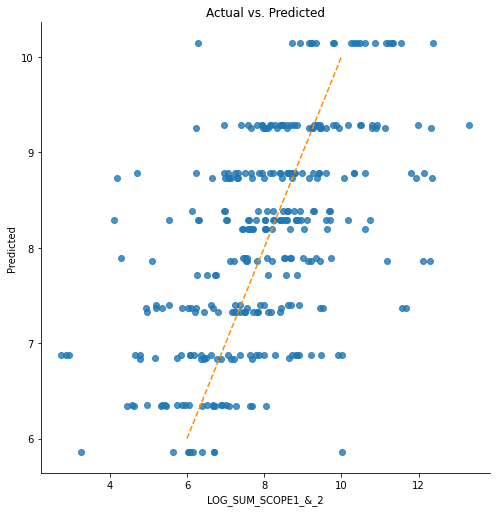

Assumption 2: Les résidus noramalement distribué 

Test de normalité Anderson-Darling
Si la p-value du test - alpha > 0.05 alors les résidus peuvent etre normalement distribué: 0.00038211495350095627
Résidus NON normalement dsitribué


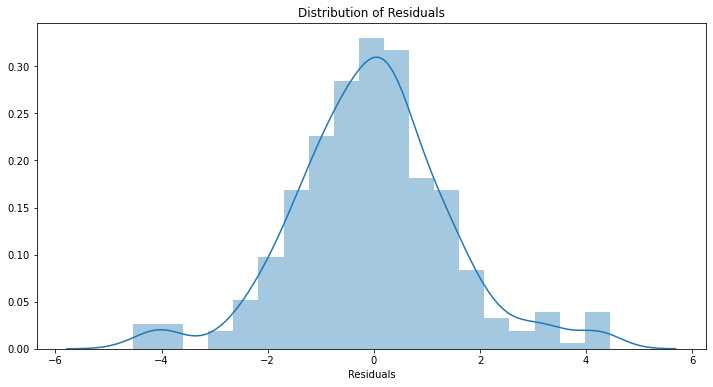

--------------------------------------------------
Assumption not satisfied

Des problèmes avec les intervalles de confiance peuvent apparaitre
Des transformations non linéaires de variables peuvent résoudre ce problème.
--------------------------------------------------
Assumption 3: Multicollinearité  

Variance Inflation Factors (VIF)
> 10: Une Multicollinearité subsiste - moyenne
> 100: Une Multicollinearité subsiste - forte
-------------------------------------
Dummy_Section_cat_1        1.425497
Dummy_Section_cat_2        1.345014
Dummy_Section_cat_9        1.492122
Dummy_Section_cat_18       1.761873
Dummy_effectifs_cat_3_2    1.563259
Dummy_effectifs_cat_3_3    1.743661
Dummy_effectifs_cat_3_4    1.717586
Name: 0, dtype: float64: 0

0 nb de variables avec prb de multicollinearité
0 nb de variables avec prb de multicollinearité

Assumption satisfied
Assumption 4: No Autocorrelation 


 Durbin-Watson Test
Si Valeur d est 1.5 < d < 2.5 alors en général les résidus ne sont pas auto

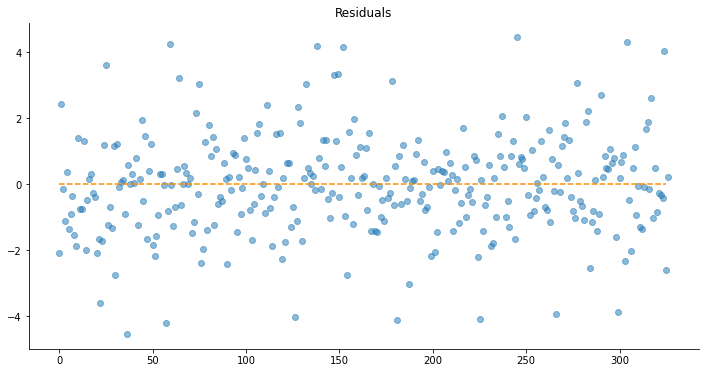

--------------------------------------------------
Heteroskedasticity tests
Test multiplicateur de Breusch-Pagan Lagrange pour l'hétéroscédasticité
Les tests d’hétéroscédasticité impliquent les deux hypothèses suivantes : 
 H0 (hypothèse nulle) : homoscédasticité. 
 Ha (hypothèse alternative) : hétéroscédasticité. 

--------------------------------------------------
[('p-value', 0.34053910556734407)]
Si la p-value est inférieure à un certain seuil (5%), alors on rejette l'hypothèse nulle d'homoscédasticité avec un risque d'erreur de première espèce de 5% 


In [61]:
linear_assumption(lr, X_test, y_test, "LOG_SUM_SCOPE1_&_2")
normal_errors_assumption(lr, X_test, y_test, "LOG_SUM_SCOPE1_&_2")
multicollinearity_assumption(lr, X_test, y_test, "LOG_SUM_SCOPE1_&_2")
autocorrelation_assumption(lr, X_test, y_test, "LOG_SUM_SCOPE1_&_2")
homoscedasticity_assumption(lr,  X_test, y_test,"LOG_SUM_SCOPE1_&_2" )

L'Assumption 1 peu ne pas etre suffisante. Si nous arrivons à trouver d'autres variables qualitatives ou quantitatives pourrait grandement ameliorer les résultats. Néanmois la partie la plus problématique concerne l'Assumption 2 qui n'est pas vérifié, les résidus ne suivent pas une loi normale. Les autres Assumptions sont vérifiées
</div>

In [62]:
def print_evaluate(true, predicted):  
    mae = round(metrics.mean_absolute_error(true, predicted),2)
    mse = round(metrics.mean_squared_error(true, predicted),2)
    rmse = round(np.sqrt(metrics.mean_squared_error(true, predicted)),2)
    r2_square = round(metrics.r2_score(true, predicted),2)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square * 100)
    print('__________________________________')
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    MAPE = round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)
    print('MAPE:', MAPE,"%")
    print('Notre algorithme se trompe en moyenne de :', MAPE, '% à la hausse ou à la baisse','\n')
#     print('Ok on se trompe de ',MAPE, "% mais est ce qu'il se trompe autant sur les gros montant (BILAN GES) que les petits","\n" )
#     print('Utilisons la WMAPE')


In [63]:
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
mean_absolute_percentage_error(y_test, test_pred )
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
mean_absolute_percentage_error(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.1
MSE: 2.18
RMSE: 1.48
R2 Square 32.0
__________________________________
MAPE: 15.52 %
Notre algorithme se trompe en moyenne de : 15.52 % à la hausse ou à la baisse 

Train set evaluation:
_____________________________________
MAE: 1.11
MSE: 2.28
RMSE: 1.51
R2 Square 33.0
__________________________________
MAPE: 14.97 %
Notre algorithme se trompe en moyenne de : 14.97 % à la hausse ou à la baisse 



*COMMENTAIRES :*      
*Revoir le modèle BASELINE, en splitant SOMME des SCOPE 1 et 2. Avoir un modèle pour chaque SCOPE, améliore-t-il le R2 ?* 


## Projection SCOPE 1 

In [64]:
DSN_PREPA_MODELING_V2 = DSN_filtre.copy()

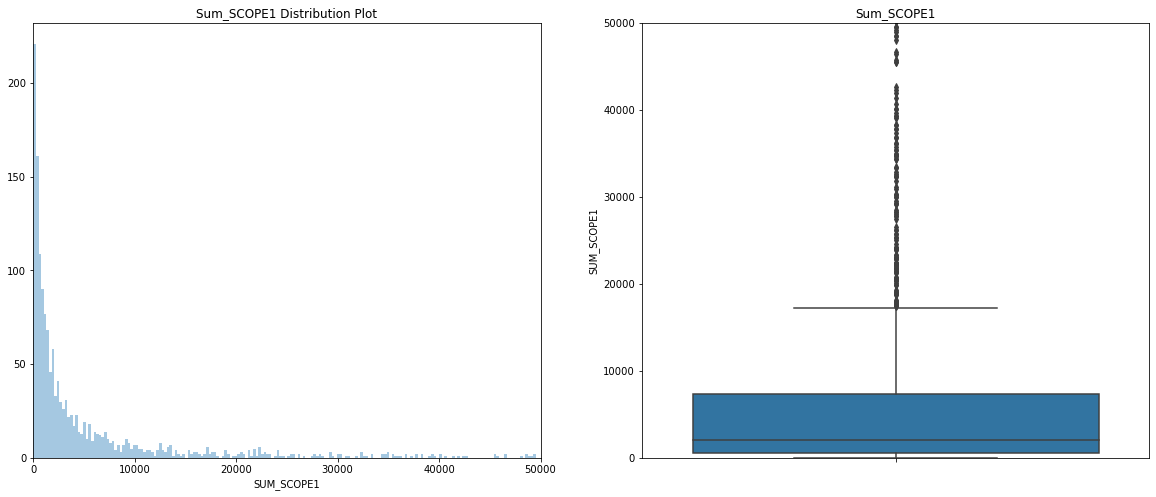

In [65]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sum_SCOPE1 Distribution Plot')
ax = sns.distplot(DSN_PREPA_MODELING_V2["SUM_SCOPE1"], kde=False, bins=5000)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlim(0,50000) 
    
plt.subplot(1,2,2)
plt.title('Sum_SCOPE1')
ax=sns.boxplot(DSN_PREPA_MODELING_V2["SUM_SCOPE1"],
            orient="v")
plt.ylim(0,50000) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

Comme précédement la variable cible est asymétrique à droite. Comme les modèles (linéaires) aiment les données normalement distribuées, nous devons transformer cette variable et la rendre plus normalement distribuée, utiliser le logarithme. Si les données ont de nombreuses valeurs extrêmes ou sont asymétriques, cette méthode permet de rendre vos données normales.
</div>

<br> 
&#10067; **HYPOTHESE** &#10067; 
<br>
<span style='color:red'>  Après avoir détecté la valeur aberrante, nous devons supprimer\traiter la valeur aberranteLes valeurs aberrantes affectent gravement la moyenne et l'écart type de l'ensemble de données. Ceux-ci peuvent statistiquement donner des résultats erronés.
* Il augmente la variance d'erreur et réduit la puissance des tests statistiques. 
<br>
<br>
Nous supprimons les 1% les plus élevé et plus faible des LOG(SOMME SCOPE 1) 
</span>

In [66]:
#on supprime les scope1 supérieur à 0 pour éviter les logarithme négatif
DSN_PREPA_MODELING_V2["LOG_SUM_SCOPE1"] = np.log(DSN_PREPA_MODELING_V2["SUM_SCOPE1"])
DSN_PREPA_MODELING_V2 = DSN_PREPA_MODELING_V2[DSN_PREPA_MODELING_V2["LOG_SUM_SCOPE1"]>0]

C:\Users\konrad.skorupa_adway\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


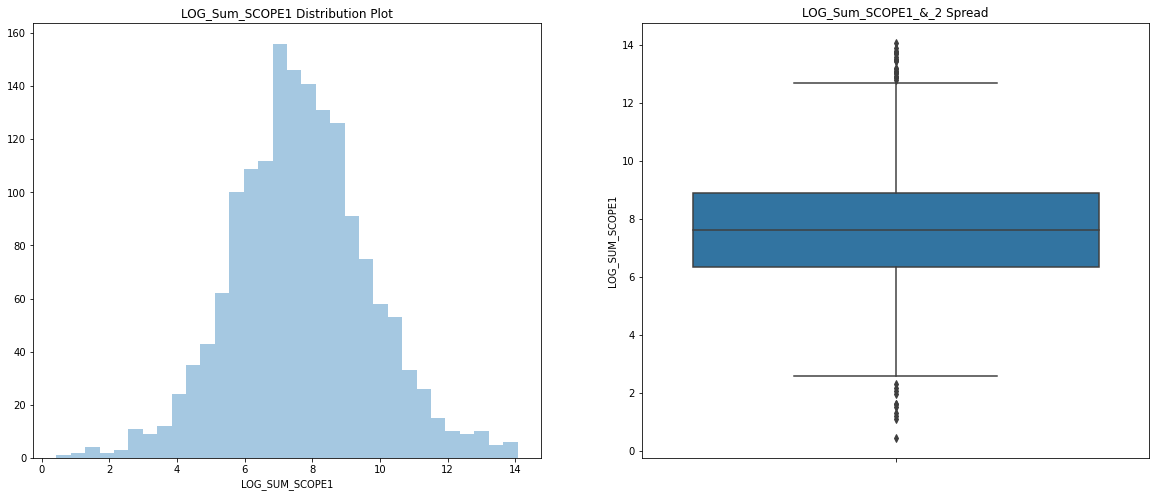

In [67]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('LOG_Sum_SCOPE1 Distribution Plot')
ax = sns.distplot(DSN_PREPA_MODELING_V2["LOG_SUM_SCOPE1"], kde=False)
    
plt.subplot(1,2,2)
plt.title('LOG_Sum_SCOPE1_&_2 Spread')
ax=sns.boxplot(DSN_PREPA_MODELING_V2["LOG_SUM_SCOPE1"],
            orient="v")

In [68]:
DSN_MODELING_V2 = DSN_PREPA_MODELING_V2.copy()
DSN_MODELING_V2 = DSN_MODELING_V2[["effectifs","Section","LOG_SUM_SCOPE1","consolidation","type"]]

In [69]:
#trasnformation des variables 
pd.qcut(DSN_MODELING_V2['effectifs'], q=4).value_counts()
labels_4 = [1, 2, 3, 4]
DSN_MODELING_V2['effectifs_cat'] = pd.qcut(DSN_MODELING_V2['effectifs'], q=4, labels=labels_4)
DSN_MODELING_V2['effectifs_cat_infos'] = pd.qcut(DSN_MODELING_V2['effectifs'], q=4)

lb_make = LabelEncoder()
DSN_MODELING_V2['Section_cat'] = lb_make.fit_transform(DSN_MODELING_V2['Section'])

DSN_MODELING_V2['consolidation_cat'] = lb_make.fit_transform(DSN_MODELING_V2['consolidation'])
DSN_MODELING_V2['type_cat'] = lb_make.fit_transform(DSN_MODELING_V2['type'])

In [70]:
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==2,"Section_cat"]=2 #Activités immobilières
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==5,"Section_cat"]=2 #Agriculture, sylviculture et pêche
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==6,"Section_cat"]=2 #Arts, spectacles et activités récréatives
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==7,"Section_cat"]=2 #Autres activités de services
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==10,"Section_cat"]=2 #Enseignement
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==11,"Section_cat"]=2 #Hébergement et restauration
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==13,"Section_cat"]=2 #Industries extractives
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==14,"Section_cat"]=2 #Information et communication
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==15,"Section_cat"]=2 #Production et distribution d'eau ;
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==16,"Section_cat"]=2 #Production et distribution d'électricité

In [71]:
#transformation de la variable scteur pour le model 
same_moy1 = KW_test_for_same_mean(DSN_MODELING_V2, "Section_cat", "LOG_SUM_SCOPE1")
same_moy1

,Valeur i,Valeur j,Valeur k,P-value,RES
86,17,2,3,0.61775,SAME MEAN
129,17,3,2,0.61775,SAME MEAN
158,2,17,3,0.61775,SAME MEAN
201,2,3,17,0.61775,SAME MEAN
585,3,17,2,0.61775,SAME MEAN
593,3,2,17,0.61775,SAME MEAN


In [72]:
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==17,"Section_cat"]=3 
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==2,"Section_cat"]=3 

In [73]:
same_moy2 = ttest_for_same_mean(DSN_MODELING_V2, "Section_cat", "LOG_SUM_SCOPE1")
same_moy2

,Valeur i,Valeur j,RES
5,12,9,SAME MEAN
25,0,1,SAME MEAN
38,1,0,SAME MEAN
42,9,12,SAME MEAN


In [74]:
#Industrie manufacturière + Construction
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==12,"Section_cat"]=9 
#Activités de services administratifs + Activités financières et d'assurance
DSN_MODELING_V2.loc[DSN_MODELING_V2["Section_cat"]==0,"Section_cat"]=1

In [75]:
#check model
dummies = pd.get_dummies(DSN_MODELING_V2['Section_cat']).rename(columns=lambda x: 'Dummy_Section_cat_' + str(x))
DSN_MODELING_V2 = pd.concat([DSN_MODELING_V2, dummies], axis=1)
dummies = pd.get_dummies(DSN_MODELING_V2['effectifs_cat']).rename(columns=lambda x: 'Dummy_effectifs_cat_3_' + str(x))
DSN_MODELING_V2 = pd.concat([DSN_MODELING_V2, dummies], axis=1)

In [76]:
y = DSN_MODELING_V2[["LOG_SUM_SCOPE1"]]

x = DSN_MODELING_V2[['effectifs_cat', 'Section_cat', 'type_cat', 'Dummy_Section_cat_3',
       'Dummy_Section_cat_4', 'Dummy_Section_cat_8', 'Dummy_Section_cat_9',
       'Dummy_Section_cat_18', 'Dummy_effectifs_cat_3_1',
       'Dummy_effectifs_cat_3_2', 'Dummy_effectifs_cat_3_3',
       'Dummy_effectifs_cat_3_4']]

#les dummy à supprimer
x = x.drop(['type_cat', "Section_cat", 
            "effectifs_cat",
           "Dummy_effectifs_cat_3_1", 
            "Dummy_Section_cat_4",
           ], axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [78]:
lr = LinearRegression()

# Entraînement du modèle
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

In [80]:
X = sm.add_constant(X_train)

model = sm.OLS(y_train, X.astype(float))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         LOG_SUM_SCOPE1   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     85.56
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          2.87e-102
Time:                        21:51:27   Log-Likelihood:                -2516.9
No. Observations:                1296   AIC:                             5050.
Df Residuals:                    1288   BIC:                             5091.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Variable Cible : LOG_SUM_SCOPE_1
<br>
D'après nos connaissances, le R2 du modèle : 31,7%, R2 ajusté : 31,4%. Durbin Watson : OK, F-stats : OK 
<br>
Toutes les variables sont significatives, p-value inférieur à 5%.
<br>
<br>
Interprétation résultat : Par rapport à la variable Dummy_effectifs_cat_3_1, Dummy_effectifs_cat_3_4 provoque 1,97x plus d'emissions GES. Par rapport à la variable Dummy_Section_cat_4, Dummy_Section_cat_18 provoque 2,73x plus d'emissions GES
Regardons les hypothèses de la régression linéaire si elles sont vérifiées

In [81]:
def homoscedasticity_assumption(model, features, label, x_model):
    """
    Homoscédasticité: suppose que les erreurs présentent une variance constante
    """
    print('Assumption 5: Homoscédasticité des Résidus', '\n')
    
    print('les Résidus doivent avoir une variance constante')
    import statsmodels.stats.api as sms
    from statsmodels.compat import lzip
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label, x_model)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  
    
    
    name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
    test = sms.het_goldfeldquandt(results.resid, results.model.exog)
    
    print(50*'-')
    print("Heteroskedasticity tests")
    print("Test multiplicateur de Breusch-Pagan Lagrange pour l'hétéroscédasticité")
    print("Les tests d’hétéroscédasticité impliquent les deux hypothèses suivantes :","\n",
        "H0 (hypothèse nulle) : homoscédasticité.","\n",
        "Ha (hypothèse alternative) : hétéroscédasticité.","\n")
    print(50*"-")
    p_value_Breusch_Pagan = lzip(name, test)[1:2]
    print(p_value_Breusch_Pagan)
    print("Si la p-value est inférieure à un certain seuil (5%), alors on rejette l'hypothèse nulle d'homoscédasticité avec un risque d'erreur de première espèce de 5% ")


Assumption 1: Relation linéaire entre la varaible cible et la predit 

Nuage de points réel vs prédit. Les prédictions doivent suivre la ligne diagonale.


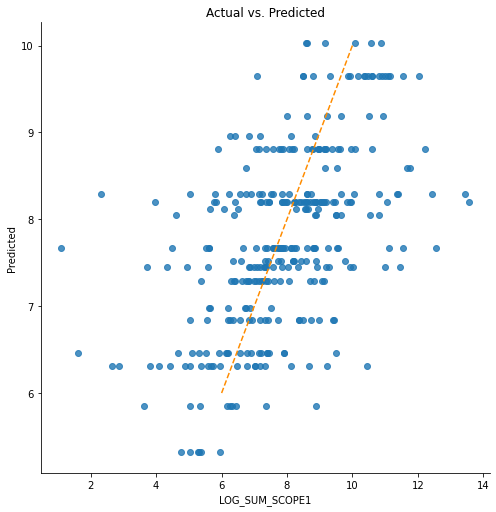

Assumption 2: Les résidus noramalement distribué 

Test de normalité Anderson-Darling
Si la p-value du test - alpha > 0.05 alors les résidus peuvent etre normalement distribué: 2.4048832225933493e-05
Résidus NON normalement dsitribué


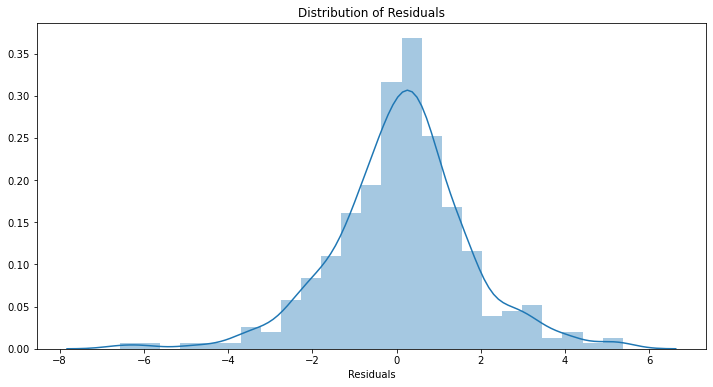

--------------------------------------------------
Assumption not satisfied

Des problèmes avec les intervalles de confiance peuvent apparaitre
Des transformations non linéaires de variables peuvent résoudre ce problème.
--------------------------------------------------
Assumption 3: Multicollinearité  

Variance Inflation Factors (VIF)
> 10: Une Multicollinearité subsiste - moyenne
> 100: Une Multicollinearité subsiste - forte
-------------------------------------
Dummy_Section_cat_3        1.470435
Dummy_Section_cat_8        1.224155
Dummy_Section_cat_9        1.632939
Dummy_Section_cat_18       1.107683
Dummy_effectifs_cat_3_2    1.633058
Dummy_effectifs_cat_3_3    1.441558
Dummy_effectifs_cat_3_4    1.360595
Name: 0, dtype: float64: 0

0 nb de variables avec prb de multicollinearité
0 nb de variables avec prb de multicollinearité

Assumption satisfied
Assumption 4: No Autocorrelation 


 Durbin-Watson Test
Si Valeur d est 1.5 < d < 2.5 alors en général les résidus ne sont pas auto

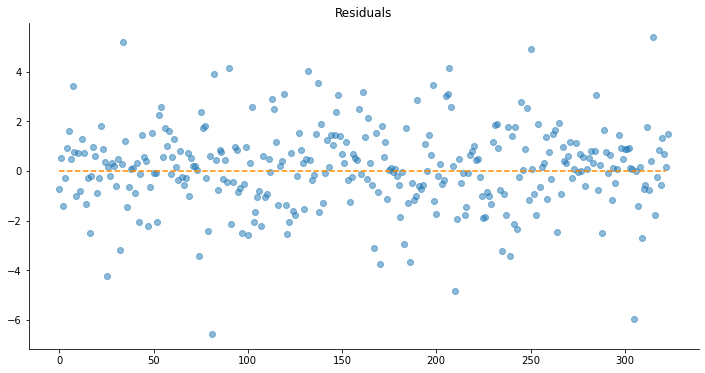

--------------------------------------------------
Heteroskedasticity tests
Test multiplicateur de Breusch-Pagan Lagrange pour l'hétéroscédasticité
Les tests d’hétéroscédasticité impliquent les deux hypothèses suivantes : 
 H0 (hypothèse nulle) : homoscédasticité. 
 Ha (hypothèse alternative) : hétéroscédasticité. 

--------------------------------------------------
[('p-value', 0.21225921598325748)]
Si la p-value est inférieure à un certain seuil (5%), alors on rejette l'hypothèse nulle d'homoscédasticité avec un risque d'erreur de première espèce de 5% 


In [82]:
linear_assumption(lr, X_test, y_test,"LOG_SUM_SCOPE1")
normal_errors_assumption(lr, X_test,y_test, "LOG_SUM_SCOPE1")
multicollinearity_assumption(lr,X_test,y_test)
autocorrelation_assumption(lr, X_test,y_test,"LOG_SUM_SCOPE1" )
homoscedasticity_assumption(lr, X_test,y_test, "LOG_SUM_SCOPE1")

L'Assumption 1 peu ne pas etre suffisante. Si nous arrivons à trouver d'autres variables qualitatives ou quantitatives pourrait grandement ameliorer les résultats. Néanmois la partie la plus problématique concerne l'Assumption 2 qui n'est pas vérifié, les résidus ne suivent pas une loi normale. Les autres Assumptions sont vérifiées
</div>

In [83]:
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
mean_absolute_percentage_error(y_test, test_pred )
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
mean_absolute_percentage_error(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.2
MSE: 2.67
RMSE: 1.63
R2 Square 28.999999999999996
__________________________________
MAPE: 19.31 %
Notre algorithme se trompe en moyenne de : 19.31 % à la hausse ou à la baisse 

Train set evaluation:
_____________________________________
MAE: 1.26
MSE: 2.85
RMSE: 1.69
R2 Square 32.0
__________________________________
MAPE: 20.89 %
Notre algorithme se trompe en moyenne de : 20.89 % à la hausse ou à la baisse 



## PROJECTION SCOPE 2

In [84]:
DSN_PREPA_MODELING_V2_2 = DSN_filtre.copy()

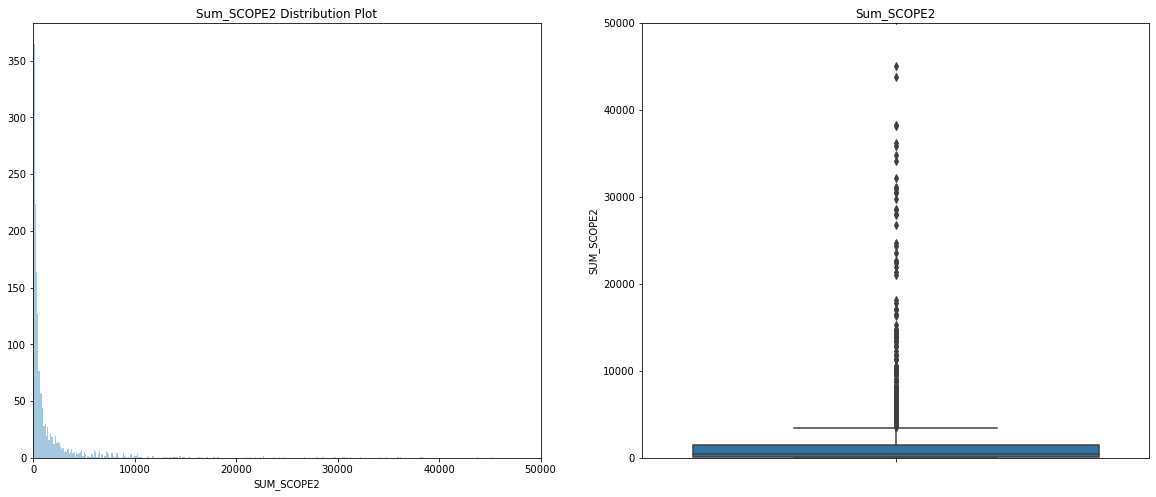

In [85]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sum_SCOPE2 Distribution Plot')
ax = sns.distplot(DSN_PREPA_MODELING_V2_2["SUM_SCOPE2"], kde=False, bins=5000)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlim(0,50000) 
    
plt.subplot(1,2,2)
plt.title('Sum_SCOPE2')
ax=sns.boxplot(DSN_PREPA_MODELING_V2_2["SUM_SCOPE2"],
            orient="v")
plt.ylim(0,50000) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

Comme précédement la variable cible est asymétrique à droite. Comme les modèles (linéaires) aiment les données normalement distribuées, nous devons transformer cette variable et la rendre plus normalement distribuée, utiliser le logarithme. Si les données ont de nombreuses valeurs extrêmes ou sont asymétriques, cette méthode permet de rendre vos données normales.
</div>

<br> 
 &#10067; **HYPOTHESE** &#10067; 
<br>
<span style='color:red'>  Après avoir détecté la valeur aberrante, nous devons supprimer\traiter la valeur aberranteLes valeurs aberrantes affectent gravement la moyenne et l'écart type de l'ensemble de données. Ceux-ci peuvent statistiquement donner des résultats erronés.
* Il augmente la variance d'erreur et réduit la puissance des tests statistiques. 
<br>
<br>
Nous supprimons les 1% les plus élevé et plus faible des LOG(SOMME SCOPE 1) 
</span>

In [86]:
DSN_PREPA_MODELING_V2_2 = DSN_PREPA_MODELING_V2_2[DSN_PREPA_MODELING_V2_2["SUM_SCOPE2"]>0]
DSN_PREPA_MODELING_V2_2["LOG_SUM_SCOPE2"]= np.log(DSN_PREPA_MODELING_V2_2["SUM_SCOPE2"])
DSN_PREPA_MODELING_V2_2 = DSN_PREPA_MODELING_V2_2[DSN_PREPA_MODELING_V2_2["LOG_SUM_SCOPE2"]>0]

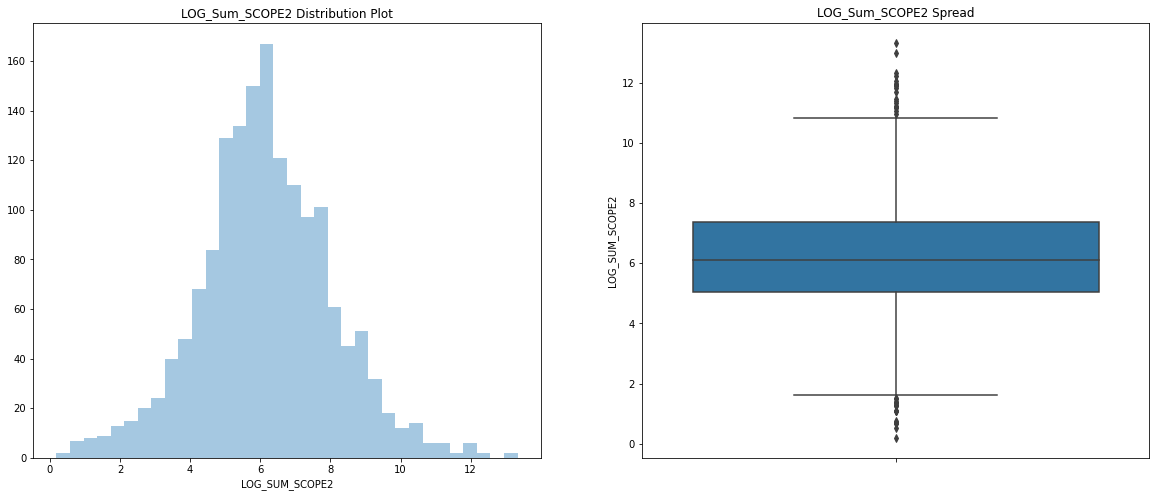

In [87]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('LOG_Sum_SCOPE2 Distribution Plot')
ax = sns.distplot(DSN_PREPA_MODELING_V2_2["LOG_SUM_SCOPE2"], kde=False)
    
plt.subplot(1,2,2)
plt.title('LOG_Sum_SCOPE2 Spread')
ax=sns.boxplot(DSN_PREPA_MODELING_V2_2["LOG_SUM_SCOPE2"],
            orient="v")

In [88]:
DSN_PREPA_MODELING_FILTER_V2_2 = DSN_PREPA_MODELING_V2_2.copy()
DSN_PREPA_MODELING_FILTER_V2_2 = DSN_PREPA_MODELING_FILTER_V2_2[["effectifs","Section","LOG_SUM_SCOPE2","consolidation","type"]]

In [89]:
pd.qcut(DSN_PREPA_MODELING_FILTER_V2_2['effectifs'], q=3).value_counts()
labels_3 = [1, 2, 3]
DSN_PREPA_MODELING_FILTER_V2_2['effectifs_cat'] = pd.qcut(DSN_PREPA_MODELING_FILTER_V2_2['effectifs'], q=3, labels=labels_3)
DSN_PREPA_MODELING_FILTER_V2_2['effectifs_cat_infos'] = pd.qcut(DSN_PREPA_MODELING_FILTER_V2_2['effectifs'], q=3)

lb_make = LabelEncoder()
DSN_PREPA_MODELING_FILTER_V2_2['Section_cat'] = lb_make.fit_transform(DSN_PREPA_MODELING_FILTER_V2_2['Section'])

DSN_PREPA_MODELING_FILTER_V2_2['consolidation_cat'] = lb_make.fit_transform(DSN_PREPA_MODELING_FILTER_V2_2['consolidation'])
DSN_PREPA_MODELING_FILTER_V2_2['type_cat'] = lb_make.fit_transform(DSN_PREPA_MODELING_FILTER_V2_2['type'])

In [90]:
DSN_MODELING_V2_2 = DSN_PREPA_MODELING_FILTER_V2_2.copy()

In [91]:
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==2,"Section_cat"]=2 #Activités immobilières
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==5,"Section_cat"]=2 #Agriculture, sylviculture et pêche
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==6,"Section_cat"]=2 #Arts, spectacles et activités récréatives
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==7,"Section_cat"]=2 #Autres activités de services
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==10,"Section_cat"]=2 #Enseignement
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==11,"Section_cat"]=2 #Hébergement et restauration
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==13,"Section_cat"]=2 #Industries extractives
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==14,"Section_cat"]=2 #Information et communication
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==15,"Section_cat"]=2 #Production et distribution d'eau ;
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==16,"Section_cat"]=2 #Production et distribution d'électricité

In [92]:
same_moy1 = KW_test_for_same_mean(DSN_MODELING_V2_2, "Section_cat", "LOG_SUM_SCOPE2")
same_moy1

,Valeur i,Valeur j,Valeur k,P-value,RES
81,17,2,18,0.210124,SAME MEAN
84,17,2,1,0.081957,SAME MEAN
86,17,2,3,0.857876,SAME MEAN
89,17,18,2,0.210124,SAME MEAN
94,17,18,3,0.170064,SAME MEAN
...,...,...,...,...,...
619,3,8,18,0.075705,SAME MEAN
621,3,8,1,0.051761,SAME MEAN
626,3,1,2,0.202340,SAME MEAN
627,3,1,18,0.165834,SAME MEAN


In [93]:
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==17,"Section_cat"]=2 
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==3,"Section_cat"]=2

In [94]:
same_moy1 = KW_test_for_same_mean(DSN_MODELING_V2_2, "Section_cat", "LOG_SUM_SCOPE2")
same_moy1

,Valeur i,Valeur j,Valeur k,P-value,RES
105,18,8,1,0.586517,SAME MEAN
111,18,1,8,0.586517,SAME MEAN
183,8,18,1,0.586517,SAME MEAN
194,8,1,18,0.586517,SAME MEAN
225,1,18,8,0.586517,SAME MEAN
236,1,8,18,0.586517,SAME MEAN


In [95]:
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==8,"Section_cat"]=1
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==18,"Section_cat"]=1

In [96]:
same_moy1 = ttest_for_same_mean(DSN_MODELING_V2_2, "Section_cat", "LOG_SUM_SCOPE2")
same_moy1

,Valeur i,Valeur j,RES
24,9,4,SAME MEAN
29,4,9,SAME MEAN


In [97]:
DSN_MODELING_V2_2.loc[DSN_MODELING_V2_2["Section_cat"]==9,"Section_cat"]=4

In [98]:
#check model
dummies = pd.get_dummies(DSN_MODELING_V2_2['Section_cat']).rename(columns=lambda x: 'Dummy_Section_cat_' + str(x))
DSN_MODELING_V2_2 = pd.concat([DSN_MODELING_V2_2, dummies], axis=1)
dummies = pd.get_dummies(DSN_MODELING_V2_2['effectifs_cat']).rename(columns=lambda x: 'Dummy_effectifs_cat_3_' + str(x))
DSN_MODELING_V2_2 = pd.concat([DSN_MODELING_V2_2, dummies], axis=1)

In [99]:
y = DSN_MODELING_V2_2[["LOG_SUM_SCOPE2"]]

x = DSN_MODELING_V2_2[['effectifs_cat', 'Section_cat', 'type_cat', 'Dummy_Section_cat_0',
       'Dummy_Section_cat_1', 'Dummy_Section_cat_2', 'Dummy_Section_cat_4',
       'Dummy_Section_cat_12', 'Dummy_effectifs_cat_3_1',
       'Dummy_effectifs_cat_3_2', 'Dummy_effectifs_cat_3_3']]

x = x.drop(['type_cat', "Section_cat", 
            "effectifs_cat",
           "Dummy_effectifs_cat_3_1", 
            "Dummy_Section_cat_0"], axis=1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [101]:
lr = LinearRegression()

# Entraînement du modèle
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

In [103]:
X = sm.add_constant(X_train)

model = sm.OLS(y_train, X.astype(float))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         LOG_SUM_SCOPE2   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     92.25
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.74e-96
Time:                        21:51:55   Log-Likelihood:                -2418.3
No. Observations:                1283   AIC:                             4851.
Df Residuals:                    1276   BIC:                             4887.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Variable Cible : LOG_SUM_SCOPE_2
<br>
D'après nos connaissances, le R2 du modèle : 30,3%, R2 ajusté : 29,9%. Durbin Watson : OK, F-stats : OK 
<br>
Toutes les variables sont significatives, p-value inférieur à 5%.
<br>
<br>
Interprétation résultat : Par rapport à la variable Dummy_effectifs_cat_3_1, Dummy_effectifs_cat_3_3 provoque 1,59x plus d'emissions GES. Par rapport à la variable Dummy_Section_cat_0, Dummy_Section_cat_12 provoque 3,34x plus d'emissions GES
Regardons les hypothèses de la régression linéaire si elles sont vérifiées

Assumption 1: Relation linéaire entre la varaible cible et la predit 

Nuage de points réel vs prédit. Les prédictions doivent suivre la ligne diagonale.


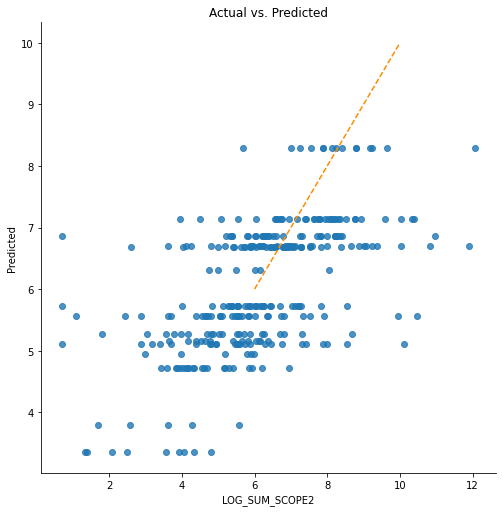

Assumption 2: Les résidus noramalement distribué 

Test de normalité Anderson-Darling
Si la p-value du test - alpha > 0.05 alors les résidus peuvent etre normalement distribué: 4.716307152936989e-06
Résidus NON normalement dsitribué


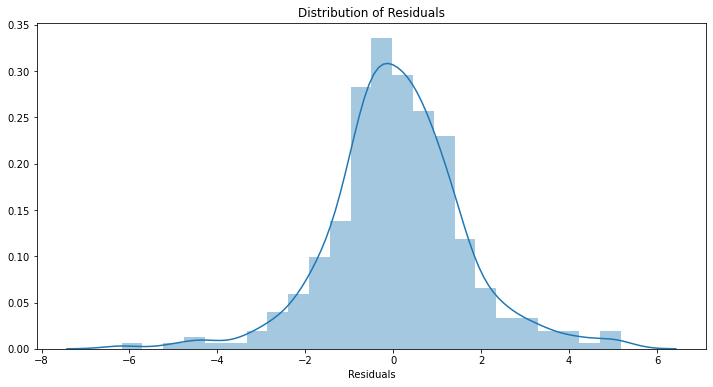

--------------------------------------------------
Assumption not satisfied

Des problèmes avec les intervalles de confiance peuvent apparaitre
Des transformations non linéaires de variables peuvent résoudre ce problème.
--------------------------------------------------
Assumption 3: Multicollinearité  

Variance Inflation Factors (VIF)
> 10: Une Multicollinearité subsiste - moyenne
> 100: Une Multicollinearité subsiste - forte
-------------------------------------
Dummy_Section_cat_1        1.669541
Dummy_Section_cat_2        1.602105
Dummy_Section_cat_4        1.118788
Dummy_Section_cat_12       1.415961
Dummy_effectifs_cat_3_2    2.001974
Dummy_effectifs_cat_3_3    1.804419
Name: 0, dtype: float64: 0

0 nb de variables avec prb de multicollinearité
0 nb de variables avec prb de multicollinearité

Assumption satisfied
Assumption 4: No Autocorrelation 


 Durbin-Watson Test
Si Valeur d est 1.5 < d < 2.5 alors en général les résidus ne sont pas autocorrélés 
0 to 2< est positive autoc

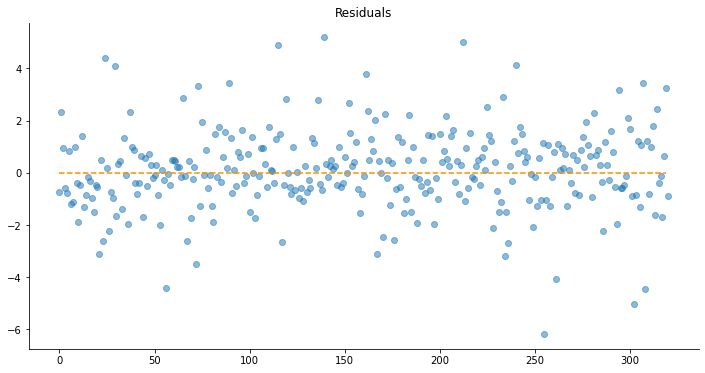

--------------------------------------------------
Heteroskedasticity tests
Test multiplicateur de Breusch-Pagan Lagrange pour l'hétéroscédasticité
Les tests d’hétéroscédasticité impliquent les deux hypothèses suivantes : 
 H0 (hypothèse nulle) : homoscédasticité. 
 Ha (hypothèse alternative) : hétéroscédasticité. 

--------------------------------------------------
[('p-value', 0.9656505235359945)]
Si la p-value est inférieure à un certain seuil (5%), alors on rejette l'hypothèse nulle d'homoscédasticité avec un risque d'erreur de première espèce de 5% 


In [104]:
linear_assumption(lr, X_test, y_test,"LOG_SUM_SCOPE2")
normal_errors_assumption(lr, X_test,y_test, "LOG_SUM_SCOPE2" )
multicollinearity_assumption(lr,X_test,y_test)
autocorrelation_assumption(lr, X_test,y_test,"LOG_SUM_SCOPE2" )
homoscedasticity_assumption(lr, X_test,y_test, "LOG_SUM_SCOPE2" )

L'Assumption 1 peu ne pas etre suffisante. Si nous arrivons à trouver d'autres variables qualitatives ou quantitatives pourrait grandement ameliorer les résultats. Néanmois la partie la plus problématique concerne l'Assumption 2 qui n'est pas vérifié, les résidus ne suivent pas une loi normale. Les autres Assumptions sont vérifiées
</div>

In [105]:
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
mean_absolute_percentage_error(y_test, test_pred )
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
mean_absolute_percentage_error(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.12
MSE: 2.34
RMSE: 1.53
R2 Square 34.0
__________________________________
MAPE: 27.86 %
Notre algorithme se trompe en moyenne de : 27.86 % à la hausse ou à la baisse 

Train set evaluation:
_____________________________________
MAE: 1.17
MSE: 2.54
RMSE: 1.59
R2 Square 30.0
__________________________________
MAPE: 28.08 %
Notre algorithme se trompe en moyenne de : 28.08 % à la hausse ou à la baisse 



<hr style = "border-width:2px;border-color:#c7cf00">
## **F. FIN**  &#10004;
<hr style = "border-width:2px;border-color:#c7cf00">
<br>

<p> Le fait de spliter la somme des SCOPE 1 et SCOPE 2 ne permet pas d'améliorer le modèle BASELINE, au contraire nous régressons en terme du R2 et des metrics tel que MAPE. Les résultats peuvent être améliorer en ajoutant d'autres variables dans le modèle ainsi notre modèle gagnera en efficacité, en pertinence... 